<a href="https://colab.research.google.com/github/BJAPL/DisPerSE/blob/main/Filamento3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import dispersereader as dsp

In [ ]:
### Codigo para testear la rutina:
filename_s3 =  "sussing_125.z0.000_filt_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl"
filename_s5 = "sussing_125.z0.000_filt_NP.a.ND.NDnet_s5.up.NDskl.a.NDskl"
filename_s10 = "sussing_125.z0.000_filt_NP.a.ND.NDnet_s10.up.NDskl.a.NDskl"


#dinfo = get_datainfo
d = dsp.read_NDskl_ascii(filename_s3)
s = dsp.read_NDskl_ascii(filename_s5)
a = dsp.read_NDskl_ascii(filename_s10)

In [ ]:
d.keys()
s.keys()
a.keys()


dict_keys(['METADATA', 'CRITICAL_POINTS', 'FILAMENTS', 'CRITICAL_POINTS_DATA', 'FILAMENTS_DATA'])

In [ ]:
d

{'METADATA': {'Ndims': 3,
  'BBOX_min': [0.0, 0.0, 0.0],
  'BBOX_max': [1000000.0, 1000000.0, 1000000.0],
  'CriticalPoints': 9857,
  'CriticalPoints_NumFils': 19550,
  'Filaments': 9775,
  'Filaments_NumPoints': 85845,
  'CriticalPointsData_NF': 9,
  'CriticalPointsData_Fields': ['persistence_ratio',
   'persistence_nsigmas',
   'persistence',
   'persistence_pair',
   'parent_index',
   'parent_log_index',
   'log_field_value',
   'field_value',
   'cell'],
  'FilamentsData_NF': 5,
  'FilamentsData_Fields': ['field_value',
   'orientation',
   'cell',
   'log_field_value',
   'type']},
 'CRITICAL_POINTS': {'CPinfo':       type      Pos0      Pos1      Pos2         value  pairID  boundary  \
  0        3  463427.0  999625.0  425189.0  5.833100e-08    3557         0   
  1        3  467547.0  898955.0  383675.0  4.575580e-08    2884         0   
  2        3  450204.0  889898.0  389081.0  2.364180e-07    4571         0   
  3        3  463818.0  920946.0  371704.0  7.509110e-08    4667

In [ ]:
s

{'METADATA': {'Ndims': 3,
  'BBOX_min': [0.0, 0.0, 0.0],
  'BBOX_max': [1000000.0, 1000000.0, 1000000.0],
  'CriticalPoints': 1563,
  'CriticalPoints_NumFils': 3076,
  'Filaments': 1538,
  'Filaments_NumPoints': 80715,
  'CriticalPointsData_NF': 9,
  'CriticalPointsData_Fields': ['persistence_ratio',
   'persistence_nsigmas',
   'persistence',
   'persistence_pair',
   'parent_index',
   'parent_log_index',
   'log_field_value',
   'field_value',
   'cell'],
  'FilamentsData_NF': 5,
  'FilamentsData_Fields': ['field_value',
   'orientation',
   'cell',
   'log_field_value',
   'type']},
 'CRITICAL_POINTS': {'CPinfo':       type      Pos0      Pos1      Pos2         value  pairID  boundary  \
  0        3  466407.0  917910.0  382319.0  5.099160e-07     545         0   
  1        3  457912.0  914623.0  370128.0  7.236150e-07     546         0   
  2        3  448145.0  891320.0  390843.0  2.541000e-07     543         0   
  3        3  448136.0  935829.0  381617.0  4.776860e-07     254 

In [ ]:
a

{'METADATA': {'Ndims': 3,
  'BBOX_min': [0.0, 0.0, 0.0],
  'BBOX_max': [1000000.0, 1000000.0, 1000000.0],
  'CriticalPoints': 9,
  'CriticalPoints_NumFils': 2,
  'Filaments': 1,
  'Filaments_NumPoints': 912,
  'CriticalPointsData_NF': 9,
  'CriticalPointsData_Fields': ['persistence_ratio',
   'persistence_nsigmas',
   'persistence',
   'persistence_pair',
   'parent_index',
   'parent_log_index',
   'log_field_value',
   'field_value',
   'cell'],
  'FilamentsData_NF': 5,
  'FilamentsData_Fields': ['field_value',
   'orientation',
   'cell',
   'log_field_value',
   'type']},
 'CRITICAL_POINTS': {'CPinfo':    type      Pos0      Pos1      Pos2         value  pairID  boundary  nfil  \
  0     3  466126.0  915882.0  391797.0  2.945050e-05       0         0     1   
  1     2  480499.0  889520.0  482092.0  4.698180e-10       1         2     1   
  2     1  445391.0  915029.0  468020.0  1.241660e-11       7         2     0   
  3     1  448982.0  889672.0  468853.0  1.052420e-11       5   

In [ ]:
import matplotlib.pyplot as plt

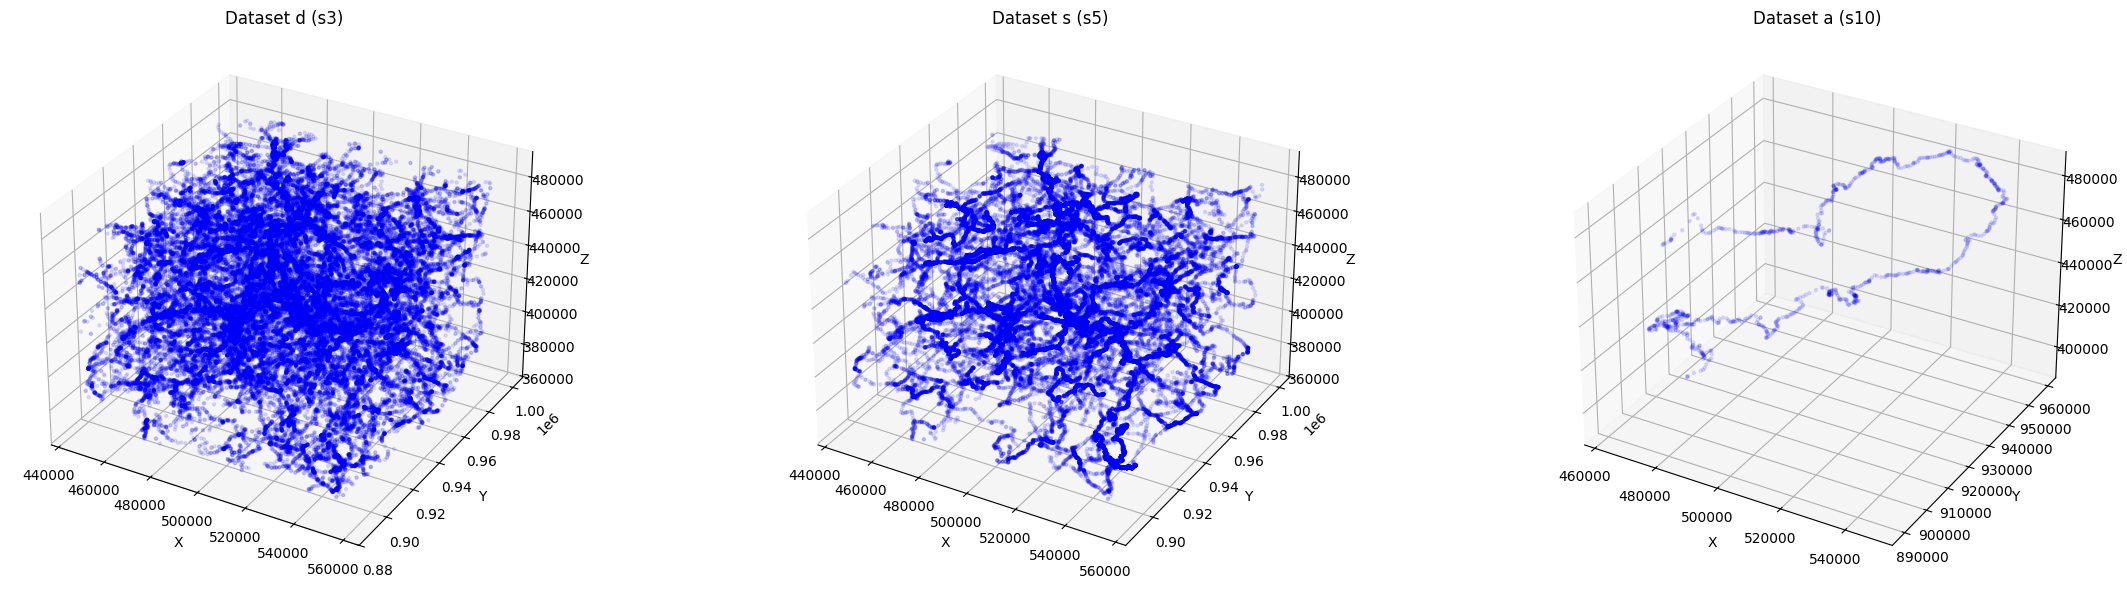

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y 3 ejes 3D uno al lado del otro
fig, axes = plt.subplots(1, 3, figsize=(24, 6), subplot_kw={'projection': '3d'})

# Data
datasets = [d, s, a]
titles = ['Dataset d (s3)', 'Dataset s (s5)', 'Dataset a (s10)']

for i, ax in enumerate(axes):
    dataset = datasets[i]
    title = titles[i]

    # Extraer coordenadas X, Y, Z
    x = dataset["FILAMENTS"]["SamplingPoints"][:, 0]
    y = dataset["FILAMENTS"]["SamplingPoints"][:, 1]
    z = dataset["FILAMENTS"]["SamplingPoints"][:, 2]

    # Dibujar los puntos en 3D
    ax.scatter(x, y, z, c='b', alpha=0.1, marker='.')

    # Etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

# Mostrar la figura
plt.tight_layout()
plt.savefig('filamentos3D.pdf', format='pdf')
plt.show()


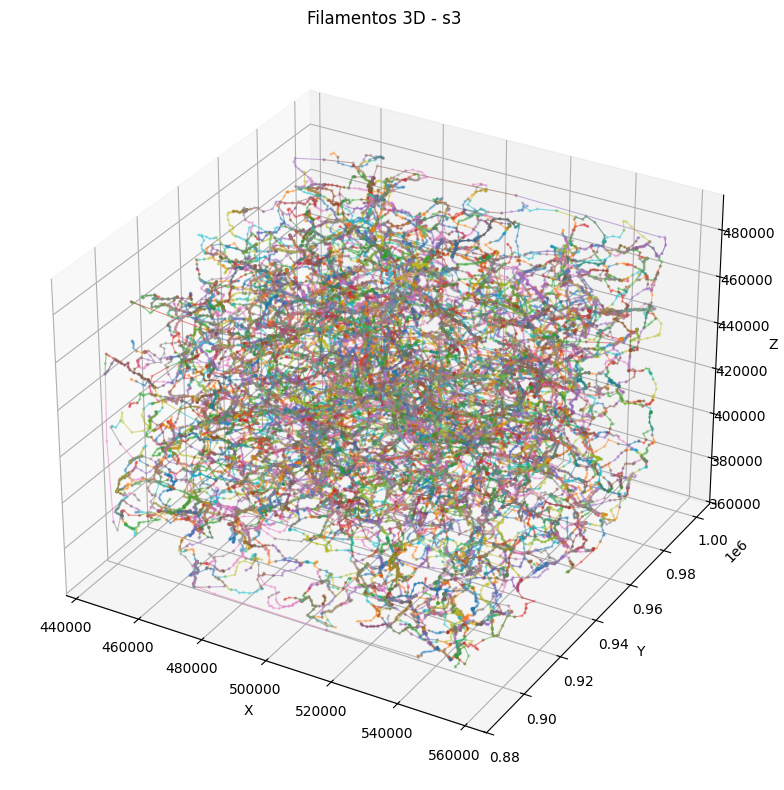

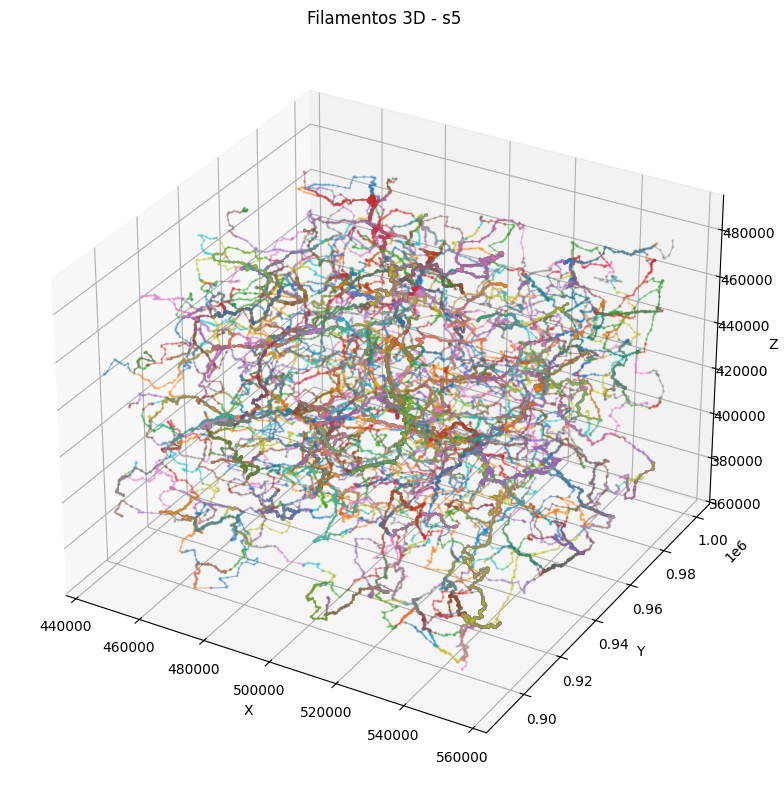

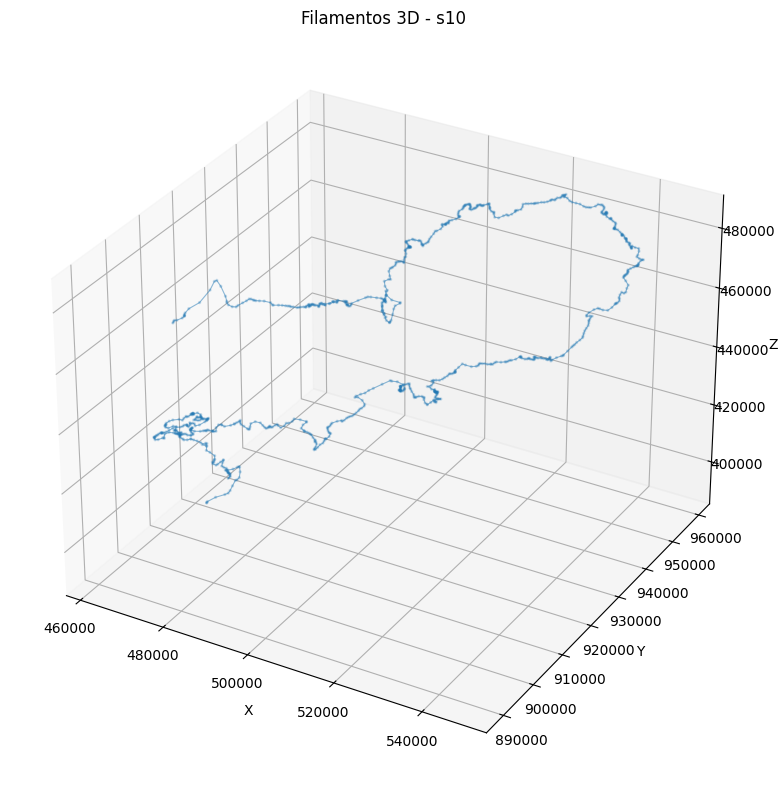

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Función para graficar filamentos 3D
def plot_filaments_3d(dataset, nombre_dataset):
    if 'FILAMENTS' in dataset and isinstance(dataset['FILAMENTS'], dict):
        filamentos_data = dataset['FILAMENTS']
        if 'SamplingPoints' in filamentos_data and 'Finfo' in filamentos_data:
            sampling_points = filamentos_data["SamplingPoints"]  # (N, 3)
            finfo = filamentos_data["Finfo"]                     # DataFrame con info de los filamentos

            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')

            for index, row in finfo.iterrows():
                start = row["firstIndex"]
                size = row["nSamp"]

                if start < 0 or size < 0 or start + size > len(sampling_points):
                    print(f"Warning: Índices inválidos para el filamento {index} en {nombre_dataset}.")
                    continue

                filament_points = sampling_points[start : start + size]
                if filament_points.shape[0] < 2:
                    continue

                x, y, z = filament_points[:, 0], filament_points[:, 1], filament_points[:, 2]
                ax.plot(x, y, z, linewidth=0.8, alpha=0.5)
                ax.scatter(x, y, z, alpha=0.2, s=2)

            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.set_title(f"Filamentos 3D - {nombre_dataset}")
            plt.tight_layout()
            plt.savefig(f"filamentos_3d_{nombre_dataset}.png")
            plt.show()
        else:
            print(f"Faltan claves 'SamplingPoints' o 'Finfo' en {nombre_dataset}.")
    else:
        print(f"Estructura inválida en {nombre_dataset}.")

# Llamar a la función para cada dataset
plot_filaments_3d(d, "s3")
plot_filaments_3d(s, "s5")
plot_filaments_3d(a, "s10")



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Función para graficar filamentos 3D y guardar en PDF
def plot_filaments_3d(dataset, nombre_dataset):
    if 'FILAMENTS' in dataset and isinstance(dataset['FILAMENTS'], dict):
        filamentos_data = dataset['FILAMENTS']
        if 'SamplingPoints' in filamentos_data and 'Finfo' in filamentos_data:
            sampling_points = filamentos_data["SamplingPoints"]  # (N, 3)
            finfo = filamentos_data["Finfo"]                     # DataFrame con info de los filamentos

            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')

            for index, row in finfo.iterrows():
                start = row["firstIndex"]
                size = row["nSamp"]

                if start < 0 or size < 0 or start + size > len(sampling_points):
                    print(f"Warning: Índices inválidos para el filamento {index} en {nombre_dataset}.")
                    continue

                filament_points = sampling_points[start : start + size]
                if filament_points.shape[0] < 2:
                    continue

                x, y, z = filament_points[:, 0], filament_points[:, 1], filament_points[:, 2]
                ax.plot(x, y, z, linewidth=0.8, alpha=0.5)
                ax.scatter(x, y, z, alpha=0.2, s=2)

            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.set_title(f"Filamentos 3D - {nombre_dataset}")
            plt.tight_layout()
            plt.savefig(f"filamentos_3d_{nombre_dataset}.pdf")  # Guarda en PDF
            plt.close(fig)  # Cierra la figura para no ocupar memoria
        else:
            print(f"Faltan claves 'SamplingPoints' o 'Finfo' en {nombre_dataset}.")
    else:
        print(f"Estructura inválida en {nombre_dataset}.")

# Llamar a la función para cada dataset
plot_filaments_3d(d, "s3")
plot_filaments_3d(s, "s5")
plot_filaments_3d(a, "s10")


In [ ]:
print(type(d["FILAMENTS"]["SamplingPoints"]))
print(d["FILAMENTS"]["SamplingPoints"].shape)
print(d["FILAMENTS"].keys())
print(type(s["FILAMENTS"]["SamplingPoints"]))
print(s["FILAMENTS"]["SamplingPoints"].shape)
print(s["FILAMENTS"].keys())
print(type(a["FILAMENTS"]["SamplingPoints"]))
print(a["FILAMENTS"]["SamplingPoints"].shape)
print(a["FILAMENTS"].keys())

<class 'numpy.ndarray'>
(85845, 3)
dict_keys(['Finfo', 'SamplingPoints'])
<class 'numpy.ndarray'>
(80715, 3)
dict_keys(['Finfo', 'SamplingPoints'])
<class 'numpy.ndarray'>
(912, 3)
dict_keys(['Finfo', 'SamplingPoints'])


In [ ]:
print(d["FILAMENTS"]["Finfo"].columns)
print(d["FILAMENTS"]["Finfo"].iloc[0])
print(s["FILAMENTS"]["Finfo"].columns)
print(s["FILAMENTS"]["Finfo"].iloc[0])
print(a["FILAMENTS"]["Finfo"].columns)
print(a["FILAMENTS"]["Finfo"].iloc[0])

Index(['CP1', 'CP2', 'nSamp', 'firstIndex'], dtype='object')
CP1           2556
CP2           1885
nSamp            9
firstIndex       0
Name: 0, dtype: int64
Index(['CP1', 'CP2', 'nSamp', 'firstIndex'], dtype='object')
CP1           236
CP2           161
nSamp          48
firstIndex      0
Name: 0, dtype: int64
Index(['CP1', 'CP2', 'nSamp', 'firstIndex'], dtype='object')
CP1             1
CP2             0
nSamp         912
firstIndex      0
Name: 0, dtype: int64


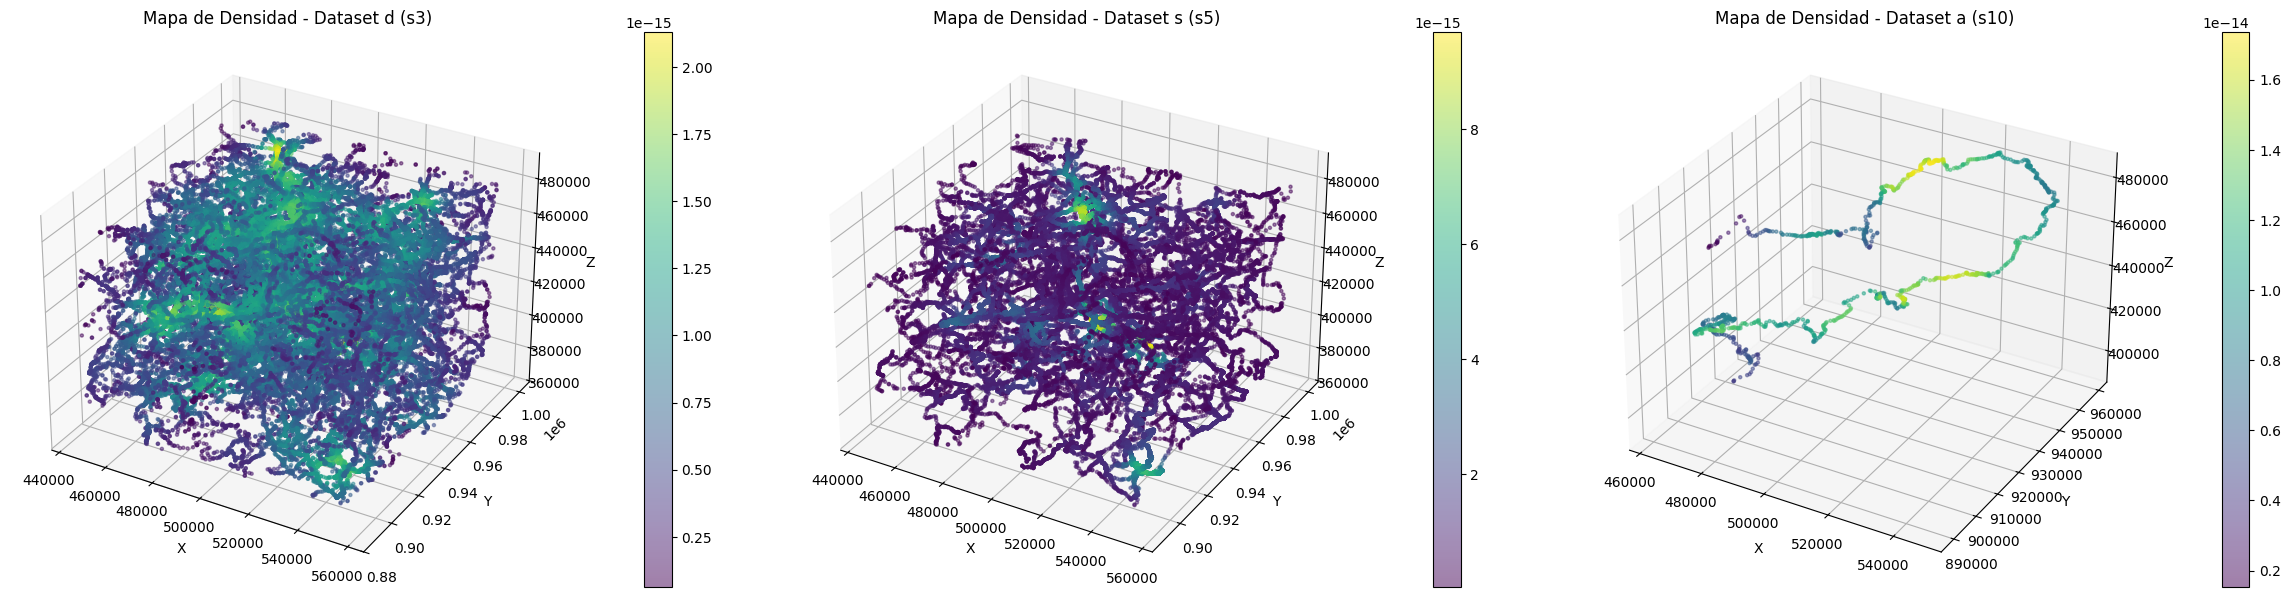

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Crear la figura y 3 ejes 3D uno al lado del otro
fig, axes = plt.subplots(1, 3, figsize=(24, 6), subplot_kw={'projection': '3d'})

# Data
datasets = [d, s, a]
titles = ['Mapa de Densidad - Dataset d (s3)', 'Mapa de Densidad - Dataset s (s5)', 'Mapa de Densidad - Dataset a (s10)']

for i, ax in enumerate(axes):
    dataset = datasets[i]
    title = titles[i]

    # Extraer coordenadas X, Y, Z
    x = dataset["FILAMENTS"]["SamplingPoints"][:, 0]
    y = dataset["FILAMENTS"]["SamplingPoints"][:, 1]
    z = dataset["FILAMENTS"]["SamplingPoints"][:, 2]

    # Combinar coordenadas en un array 3D
    data = np.vstack([x, y, z])

    # Calcular la densidad usando KDE
    kde = gaussian_kde(data)

    # Evaluar la densidad en los puntos originales
    density = kde(data)

    # Ordenar los puntos por densidad para un mejor visualización del mapa de color
    idx = density.argsort()
    x, y, z, density = x[idx], y[idx], z[idx], density[idx]

    # Dibujar los puntos con color basado en la densidad
    scatter = ax.scatter(x, y, z, c=density, cmap='viridis', marker='.', alpha=0.5)

    # Agregar barra de color
    fig.colorbar(scatter, ax=ax, pad=0.1)

    # Etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

# Ajustar el diseño
plt.tight_layout()
plt.savefig('densidad3D.pdf', format='pdf')

# Mostrar la figura
plt.show()


In [ ]:
print(d["FILAMENTS"]["Finfo"]["nSamp"])
print(s["FILAMENTS"]["Finfo"]["nSamp"])
print(a["FILAMENTS"]["Finfo"]["nSamp"])

0        9
1        8
2        8
3       11
4        5
        ..
9770     3
9771     5
9772     8
9773     4
9774    17
Name: nSamp, Length: 9775, dtype: int64
0        48
1        15
2        36
3        13
4        32
       ... 
1533    178
1534     33
1535     42
1536     88
1537     65
Name: nSamp, Length: 1538, dtype: int64
0    912
Name: nSamp, dtype: int64


In [ ]:
datasets = [d, s, a]
dataset_names = ['d', 's', 'a']

for dataset, name in zip(datasets, dataset_names):
    print(f"Información para el dataset {name}:")
    for i, n in enumerate(dataset["FILAMENTS"]["Finfo"]["nSamp"]):
        print(f"  Filamento {i}: {n} puntos")
    print("-" * 20) # Separador entre datasets


Información para el dataset d:
  Filamento 0: 9 puntos
  Filamento 1: 8 puntos
  Filamento 2: 8 puntos
  Filamento 3: 11 puntos
  Filamento 4: 5 puntos
  Filamento 5: 11 puntos
  Filamento 6: 6 puntos
  Filamento 7: 4 puntos
  Filamento 8: 13 puntos
  Filamento 9: 17 puntos
  Filamento 10: 9 puntos
  Filamento 11: 3 puntos
  Filamento 12: 4 puntos
  Filamento 13: 4 puntos
  Filamento 14: 14 puntos
  Filamento 15: 4 puntos
  Filamento 16: 5 puntos
  Filamento 17: 3 puntos
  Filamento 18: 5 puntos
  Filamento 19: 3 puntos
  Filamento 20: 13 puntos
  Filamento 21: 4 puntos
  Filamento 22: 8 puntos
  Filamento 23: 3 puntos
  Filamento 24: 9 puntos
  Filamento 25: 3 puntos
  Filamento 26: 17 puntos
  Filamento 27: 14 puntos
  Filamento 28: 6 puntos
  Filamento 29: 4 puntos
  Filamento 30: 6 puntos
  Filamento 31: 7 puntos
  Filamento 32: 9 puntos
  Filamento 33: 17 puntos
  Filamento 34: 12 puntos
  Filamento 35: 14 puntos
  Filamento 36: 9 puntos
  Filamento 37: 3 puntos
  Filamento 38: 27

In [ ]:
import numpy as np
def calculate_filament_distances(dataset):
  distances = []
  sampling_points = dataset["FILAMENTS"]["SamplingPoints"]
  filaments_info = dataset["FILAMENTS"]["Finfo"]

  current_point_index = 0
  for index, row in filaments_info.iterrows():
    num_points = row["nSamp"]
    # Los puntos extremos son el primero y el último punto del filamento
    start_point = sampling_points[current_point_index]
    end_point = sampling_points[current_point_index + num_points - 1]

    # Calcular la distancia euclidiana entre los puntos extremos
    distance = np.linalg.norm(start_point - end_point)
    distances.append(distance)

    # Mover el índice al inicio del siguiente filamento
    current_point_index += num_points

  return distances

# Calcular y imprimir las distancias para cada dataset
distances_d = calculate_filament_distances(d)
distances_s = calculate_filament_distances(s)
distances_a = calculate_filament_distances(a)

print("Distancias entre extremos para el dataset d (s3):")
for i, dist in enumerate(distances_d):
  print(f"  Filamento {i}: {dist:.4f}")
print("-" * 20)

print("Distancias entre extremos para el dataset s (s5):")
for i, dist in enumerate(distances_s):
  print(f"  Filamento {i}: {dist:.4f}")
print("-" * 20)

print("Distancias entre extremos para el dataset a (s10):")
for i, dist in enumerate(distances_a):
  print(f"  Filamento {i}: {dist:.4f}")
print("-" * 20)


Distancias entre extremos para el dataset d (s3):
  Filamento 0: 3489.1860
  Filamento 1: 3718.2869
  Filamento 2: 4283.6670
  Filamento 3: 11955.8232
  Filamento 4: 3129.7085
  Filamento 5: 2359.2544
  Filamento 6: 3113.9753
  Filamento 7: 1681.8571
  Filamento 8: 5217.6118
  Filamento 9: 9479.1289
  Filamento 10: 2809.5574
  Filamento 11: 1184.3453
  Filamento 12: 3346.3804
  Filamento 13: 3522.8286
  Filamento 14: 10078.4775
  Filamento 15: 7133.1187
  Filamento 16: 1654.6785
  Filamento 17: 963.0192
  Filamento 18: 1668.8002
  Filamento 19: 1203.7192
  Filamento 20: 3090.5525
  Filamento 21: 1958.5840
  Filamento 22: 3027.2617
  Filamento 23: 1625.3151
  Filamento 24: 4289.0234
  Filamento 25: 992.0187
  Filamento 26: 9428.2188
  Filamento 27: 10234.9316
  Filamento 28: 3149.8096
  Filamento 29: 2357.8420
  Filamento 30: 3735.9299
  Filamento 31: 4296.4805
  Filamento 32: 6682.9585
  Filamento 33: 9915.0605
  Filamento 34: 4643.0542
  Filamento 35: 4643.0542
  Filamento 36: 3055.85

In [ ]:
import numpy as np

def mostrar_estadisticos(distances, name):
    media = np.nanmean(distances)
    mediana = np.nanmedian(distances)
    std = np.nanstd(distances)
    print(f"Estadísticos para {name}:")
    print(f"  Media: {media:.4f}")
    print(f"  Mediana: {mediana:.4f}")
    print(f"  Desviación estándar: {std:.4f}")
    print("-" * 30)

# Ejemplo de uso con tus arrays de distancias ya calculados:
mostrar_estadisticos(distances_d, "dataset d (s3)")
mostrar_estadisticos(distances_s, "dataset s (s5)")
mostrar_estadisticos(distances_a, "dataset a (s10)")


Estadísticos para dataset d (s3):
  Media: 4530.4868
  Mediana: 3754.3987
  Desviación estándar: 3257.6382
------------------------------
Estadísticos para dataset s (s5):
  Media: 16052.6631
  Mediana: 14098.3652
  Desviación estándar: 10851.1475
------------------------------
Estadísticos para dataset a (s10):
  Media: 95156.3203
  Mediana: 95156.3203
  Desviación estándar: 0.0000
------------------------------


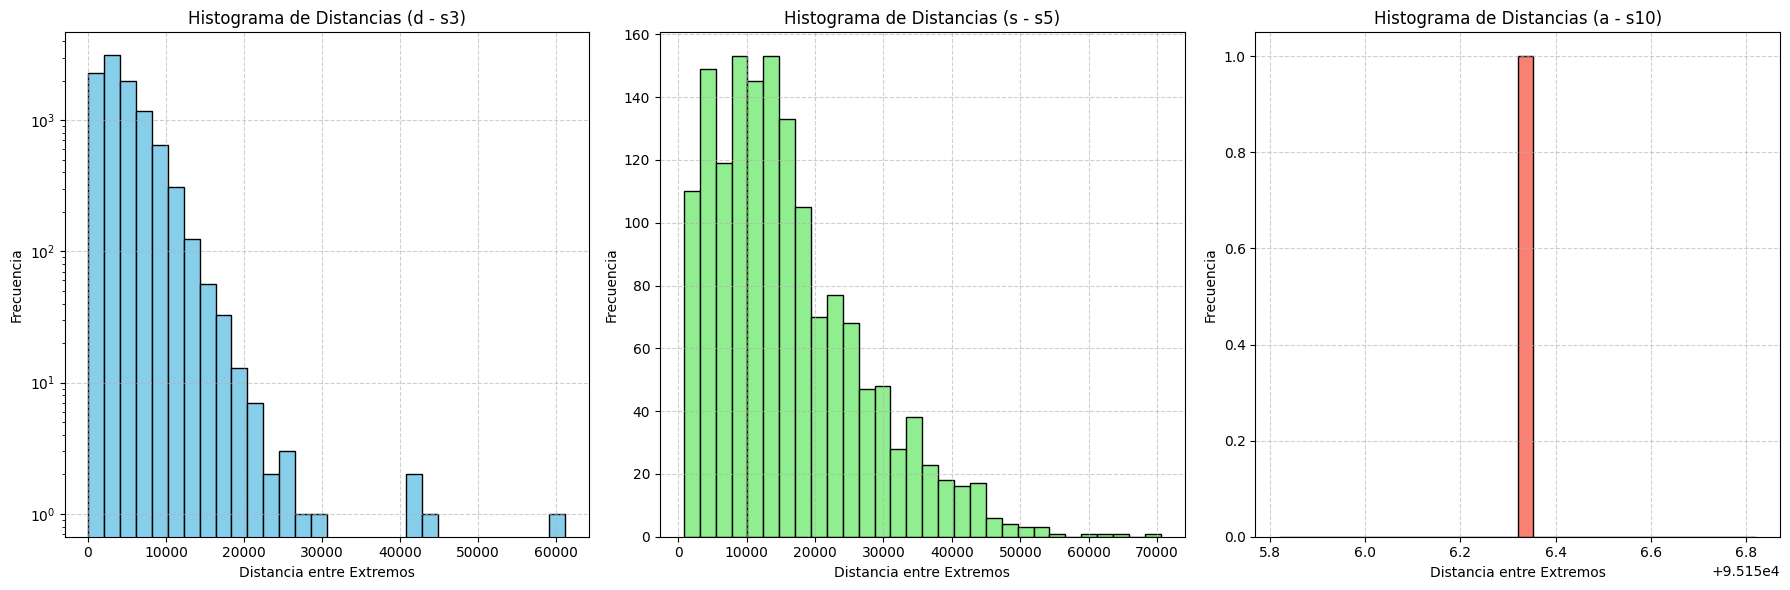

In [ ]:


import matplotlib.pyplot as plt
# Histograma de las distancias
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para dataset d
axes[0].hist(distances_d, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Distancias (d - s3)')
axes[0].set_xlabel('Distancia entre Extremos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Histograma para dataset s
axes[1].hist(distances_s, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histograma de Distancias (s - s5)')
axes[1].set_xlabel('Distancia entre Extremos')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', alpha=0.6)


# Histograma para dataset a
axes[2].hist(distances_a, bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Histograma de Distancias (a - s10)')
axes[2].set_xlabel('Distancia entre Extremos')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.savefig('extremos3D.pdf', format='pdf')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def calculate_total_filament_length(dataset):
  filament_lengths = []
  sampling_points = dataset["FILAMENTS"]["SamplingPoints"]
  filaments_info = dataset["FILAMENTS"]["Finfo"]

  current_point_index = 0
  for index, row in filaments_info.iterrows():
    num_points = row["nSamp"]
    if num_points > 1: # Solo calculamos longitud si hay al menos 2 puntos
      filament_points = sampling_points[current_point_index : current_point_index + num_points]
      # Calcular las diferencias entre puntos consecutivos
      diffs = np.diff(filament_points, axis=0)
      # Calcular la norma (distancia euclidiana) de estas diferencias y sumarlas
      length = np.sum(np.linalg.norm(diffs, axis=1))
      filament_lengths.append(length)
    else:
      # Filamentos con un solo punto tienen longitud 0
      filament_lengths.append(0)

    # Mover el índice al inicio del siguiente filamento
    current_point_index += num_points

  return filament_lengths

# Calcular y imprimir las longitudes totales para cada dataset
lengths_d = calculate_total_filament_length(d)
lengths_s = calculate_total_filament_length(s)
lengths_a = calculate_total_filament_length(a)

print("Longitud total de cada filamento para el dataset d (s3):")
for i, length in enumerate(lengths_d):
  print(f"  Filamento {i}: {length:.4f}")
print("-" * 20)

print("Longitud total de cada filamento para el dataset s (s5):")
for i, length in enumerate(lengths_s):
  print(f"  Filamento {i}: {length:.4f}")
print("-" * 20)

print("Longitud total de cada filamento para el dataset a (s10):")
for i, length in enumerate(lengths_a):
  print(f"  Filamento {i}: {length:.4f}")
print("-" * 20)


Longitud total de cada filamento para el dataset d (s3):
  Filamento 0: 6773.6709
  Filamento 1: 4188.6509
  Filamento 2: 8850.3975
  Filamento 3: 13623.1963
  Filamento 4: 3328.0361
  Filamento 5: 3682.2974
  Filamento 6: 3946.4077
  Filamento 7: 1724.2891
  Filamento 8: 7601.5591
  Filamento 9: 10697.8145
  Filamento 10: 4516.3755
  Filamento 11: 1199.1395
  Filamento 12: 3562.1333
  Filamento 13: 4575.4297
  Filamento 14: 16870.4590
  Filamento 15: 7461.0098
  Filamento 16: 2054.0303
  Filamento 17: 980.1035
  Filamento 18: 1695.4326
  Filamento 19: 1207.1848
  Filamento 20: 5370.9131
  Filamento 21: 2001.7963
  Filamento 22: 4069.3037
  Filamento 23: 1660.0018
  Filamento 24: 5152.1343
  Filamento 25: 1003.5696
  Filamento 26: 15782.8701
  Filamento 27: 16890.8457
  Filamento 28: 4364.1421
  Filamento 29: 2749.9753
  Filamento 30: 3800.4014
  Filamento 31: 6240.2983
  Filamento 32: 10123.0361
  Filamento 33: 13431.5625
  Filamento 34: 5200.9502
  Filamento 35: 6690.6836
  Filamento

In [ ]:
import numpy as np

def mostrar_estadisticos(longitudes, name):
    media = np.nanmean(longitudes)
    mediana = np.nanmedian(longitudes)
    std = np.nanstd(longitudes)
    print(f"Estadísticos para {name}:")
    print(f"  Media: {media:.4f}")
    print(f"  Mediana: {mediana:.4f}")
    print(f"  Desviación estándar: {std:.4f}")
    print("-" * 30)

# Usar con los resultados ya calculados
mostrar_estadisticos(lengths_d, "dataset d (s3)")
mostrar_estadisticos(lengths_s, "dataset s (s5)")
mostrar_estadisticos(lengths_a, "dataset a (s10)")


Estadísticos para dataset d (s3):
  Media: 6617.4902
  Mediana: 4985.0684
  Desviación estándar: 5683.8613
------------------------------
Estadísticos para dataset s (s5):
  Media: 34691.1680
  Mediana: 27825.2148
  Desviación estándar: 28330.5996
------------------------------
Estadísticos para dataset a (s10):
  Media: 562960.2500
  Mediana: 562960.2500
  Desviación estándar: 0.0000
------------------------------


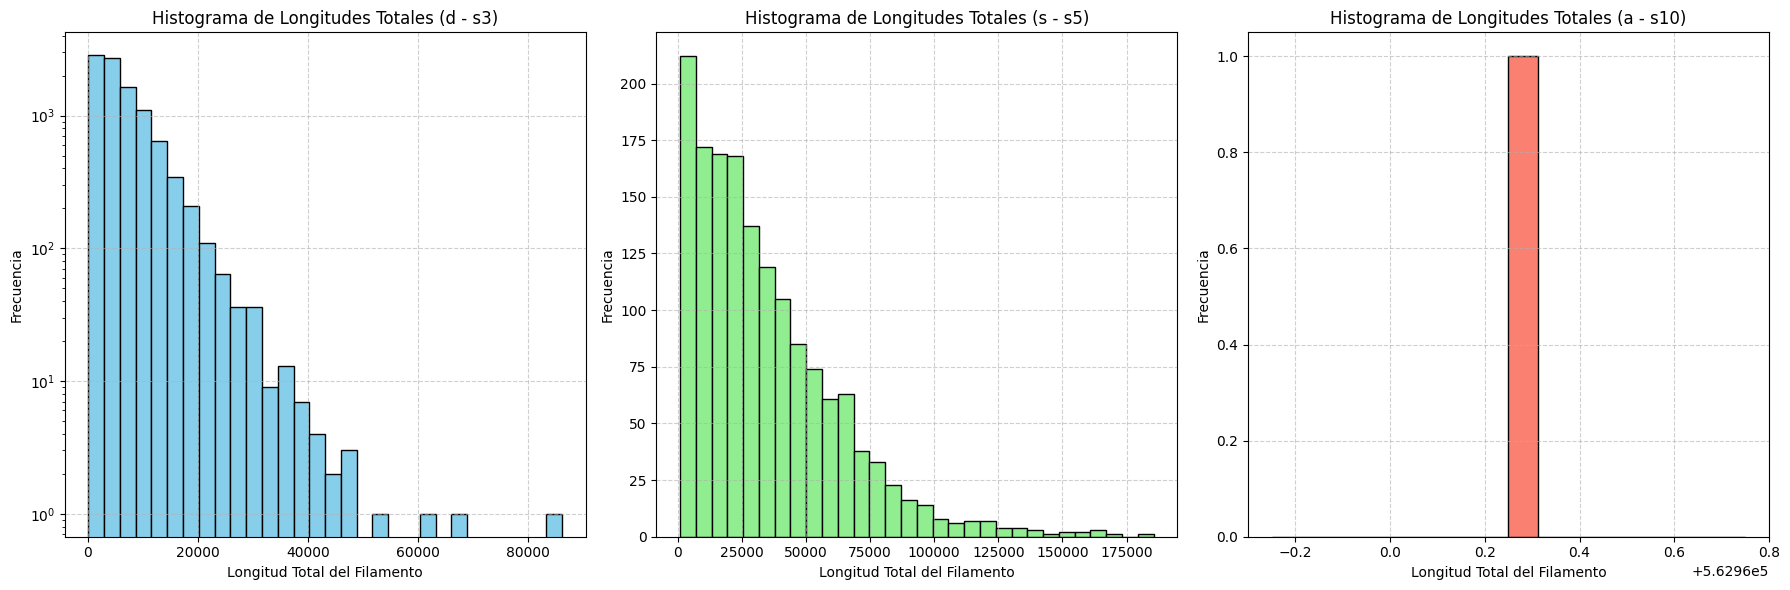

In [ ]:
# Histograma de las longitudes totales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para dataset d
axes[0].hist(lengths_d, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Longitudes Totales (d - s3)')
axes[0].set_xlabel('Longitud Total del Filamento')
axes[0].set_ylabel('Frecuencia')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Histograma para dataset s
axes[1].hist(lengths_s, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histograma de Longitudes Totales (s - s5)')
axes[1].set_xlabel('Longitud Total del Filamento')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', alpha=0.6)


# Histograma para dataset a
axes[2].hist(lengths_a, bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Histograma de Longitudes Totales (a - s10)')
axes[2].set_xlabel('Longitud Total del Filamento')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.savefig('longitud3D.pdf', format='pdf')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Función para calcular la curvatura
def calculate_curvature(total_length, end_to_end_distance):
  # Evitar división por cero o distancias muy pequeñas que puedan dar curvaturas infinitas
  if end_to_end_distance == 0:
    return 0 # O podrías retornar NaN o algún otro valor que indique indefinido
  return total_length / end_to_end_distance

# Calcular la curvatura para cada filamento en cada dataset
curvatures_d = [calculate_curvature(lengths_d[i], distances_d[i]) for i in range(len(lengths_d))]
curvatures_s = [calculate_curvature(lengths_s[i], distances_s[i]) for i in range(len(lengths_s))]
curvatures_a = [calculate_curvature(lengths_a[i], distances_a[i]) for i in range(len(lengths_a))]

print("Curvatura de cada filamento para el dataset d (s3):")
for i, curvature in enumerate(curvatures_d):
  print(f"  Filamento {i}: {curvature:.4f}")
print("-" * 20)

print("Curvatura de cada filamento para el dataset s (s5):")
for i, curvature in enumerate(curvatures_s):
  print(f"  Filamento {i}: {curvature:.4f}")
print("-" * 20)

print("Curvatura de cada filamento para el dataset a (s10):")
for i, curvature in enumerate(curvatures_a):
  print(f"  Filamento {i}: {curvature:.4f}")
print("-" * 20)


Curvatura de cada filamento para el dataset d (s3):
  Filamento 0: 1.9413
  Filamento 1: 1.1265
  Filamento 2: 2.0661
  Filamento 3: 1.1395
  Filamento 4: 1.0634
  Filamento 5: 1.5608
  Filamento 6: 1.2673
  Filamento 7: 1.0252
  Filamento 8: 1.4569
  Filamento 9: 1.1286
  Filamento 10: 1.6075
  Filamento 11: 1.0125
  Filamento 12: 1.0645
  Filamento 13: 1.2988
  Filamento 14: 1.6739
  Filamento 15: 1.0460
  Filamento 16: 1.2413
  Filamento 17: 1.0177
  Filamento 18: 1.0160
  Filamento 19: 1.0029
  Filamento 20: 1.7378
  Filamento 21: 1.0221
  Filamento 22: 1.3442
  Filamento 23: 1.0213
  Filamento 24: 1.2012
  Filamento 25: 1.0116
  Filamento 26: 1.6740
  Filamento 27: 1.6503
  Filamento 28: 1.3855
  Filamento 29: 1.1663
  Filamento 30: 1.0173
  Filamento 31: 1.4524
  Filamento 32: 1.5148
  Filamento 33: 1.3547
  Filamento 34: 1.1202
  Filamento 35: 1.4410
  Filamento 36: 1.2982
  Filamento 37: 1.1154
  Filamento 38: 1.4281
  Filamento 39: 1.0133
  Filamento 40: 1.6061
  Filamento 41:

In [ ]:
import numpy as np

def mostrar_estadisticos(longitudes, name):
    media = np.nanmean(longitudes)
    mediana = np.nanmedian(longitudes)
    std = np.nanstd(longitudes)
    print(f"Estadísticos para {name}:")
    print(f"  Media: {media:.4f}")
    print(f"  Mediana: {mediana:.4f}")
    print(f"  Desviación estándar: {std:.4f}")
    print("-" * 30)

# Asumiendo que ya tienes calculadas las listas curvatures_d, curvatures_s y curvatures_a

mostrar_estadisticos(curvatures_d, "curvaturas dataset d (s3)")
mostrar_estadisticos(curvatures_s, "curvaturas dataset s (s5)")
mostrar_estadisticos(curvatures_a, "curvaturas dataset a (s10)")


Estadísticos para curvaturas dataset d (s3):
  Media: 1.3954
  Mediana: 1.2300
  Desviación estándar: 0.4976
------------------------------
Estadísticos para curvaturas dataset s (s5):
  Media: 2.0655
  Mediana: 1.8218
  Desviación estándar: 1.0897
------------------------------
Estadísticos para curvaturas dataset a (s10):
  Media: 5.9162
  Mediana: 5.9162
  Desviación estándar: 0.0000
------------------------------


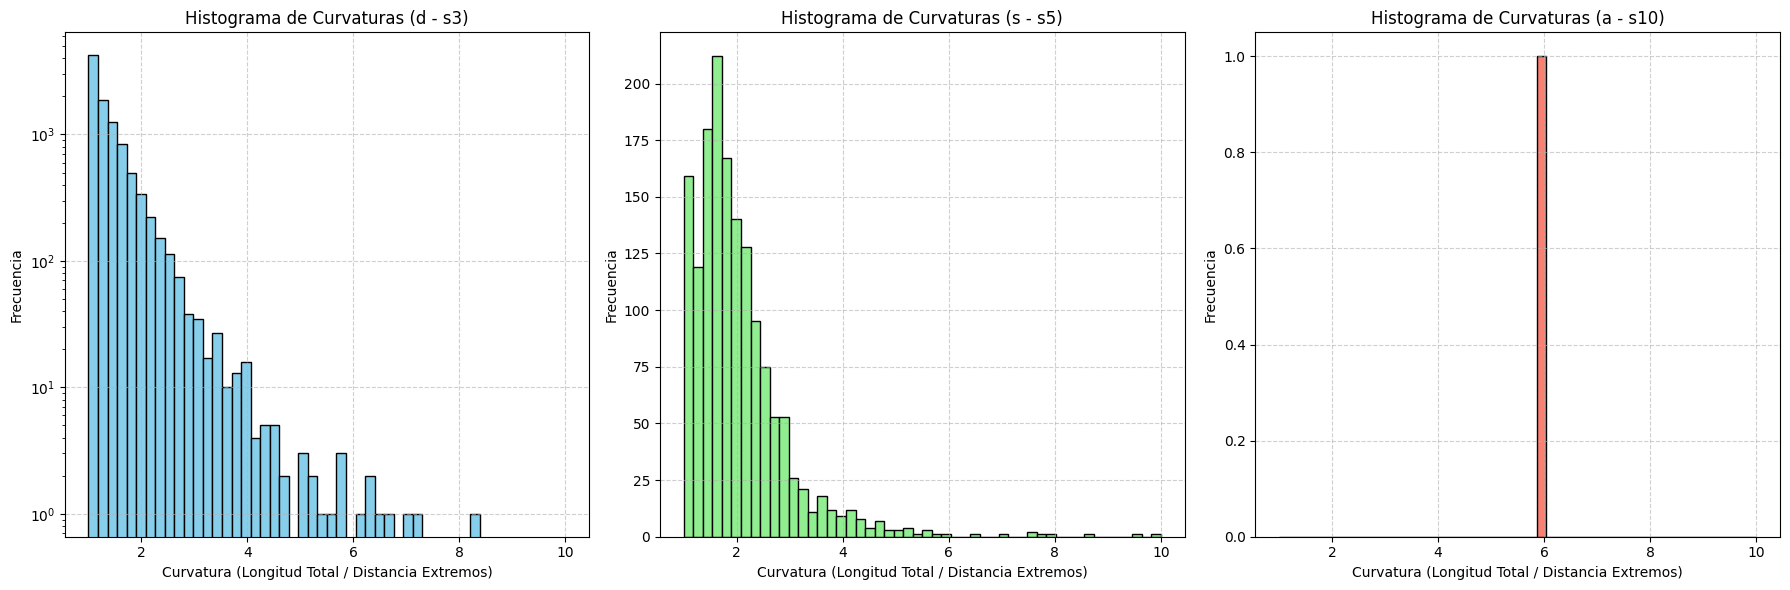

In [ ]:
# Histograma de las curvaturas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para dataset d
axes[0].hist(curvatures_d, bins=50, color='skyblue', edgecolor='black', range=(1, 10)) # Ajusta el rango de los bins si es necesario
axes[0].set_title('Histograma de Curvaturas (d - s3)')
axes[0].set_xlabel('Curvatura (Longitud Total / Distancia Extremos)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Histograma para dataset s
axes[1].hist(curvatures_s, bins=50, color='lightgreen', edgecolor='black', range=(1, 10))
axes[1].set_title('Histograma de Curvaturas (s - s5)')
axes[1].set_xlabel('Curvatura (Longitud Total / Distancia Extremos)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', alpha=0.6)


# Histograma para dataset a
axes[2].hist(curvatures_a, bins=50, color='salmon', edgecolor='black', range=(1, 10))
axes[2].set_title('Histograma de Curvaturas (a - s10)')
axes[2].set_xlabel('Curvatura (Longitud Total / Distancia Extremos)')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.savefig('curvatura3D.pdf', format='pdf')
plt.show()

In [ ]:
print("Estadísticas descriptivas de la curvatura:")
print("Dataset d (s3):")
print(f"  Media: {np.mean(curvatures_d):.4f}")
print(f"  Mediana: {np.median(curvatures_d):.4f}")
print(f"  Desviación estándar: {np.std(curvatures_d):.4f}")
print("-" * 20)

print("Dataset s (s5):")
print(f"  Media: {np.mean(curvatures_s):.4f}")
print(f"  Mediana: {np.median(curvatures_s):.4f}")
print(f"  Desviación estándar: {np.std(curvatures_s):.4f}")
print("-" * 20)

print("Dataset a (s10):")
print(f"  Media: {np.mean(curvatures_a):.4f}")
print(f"  Mediana: {np.median(curvatures_a):.4f}")
print(f"  Desviación estándar: {np.std(curvatures_a):.4f}")
print("-" * 20)

Estadísticas descriptivas de la curvatura:
Dataset d (s3):
  Media: 1.3954
  Mediana: 1.2300
  Desviación estándar: 0.4976
--------------------
Dataset s (s5):
  Media: 2.0655
  Mediana: 1.8218
  Desviación estándar: 1.0897
--------------------
Dataset a (s10):
  Media: 5.9162
  Mediana: 5.9162
  Desviación estándar: 0.0000
--------------------


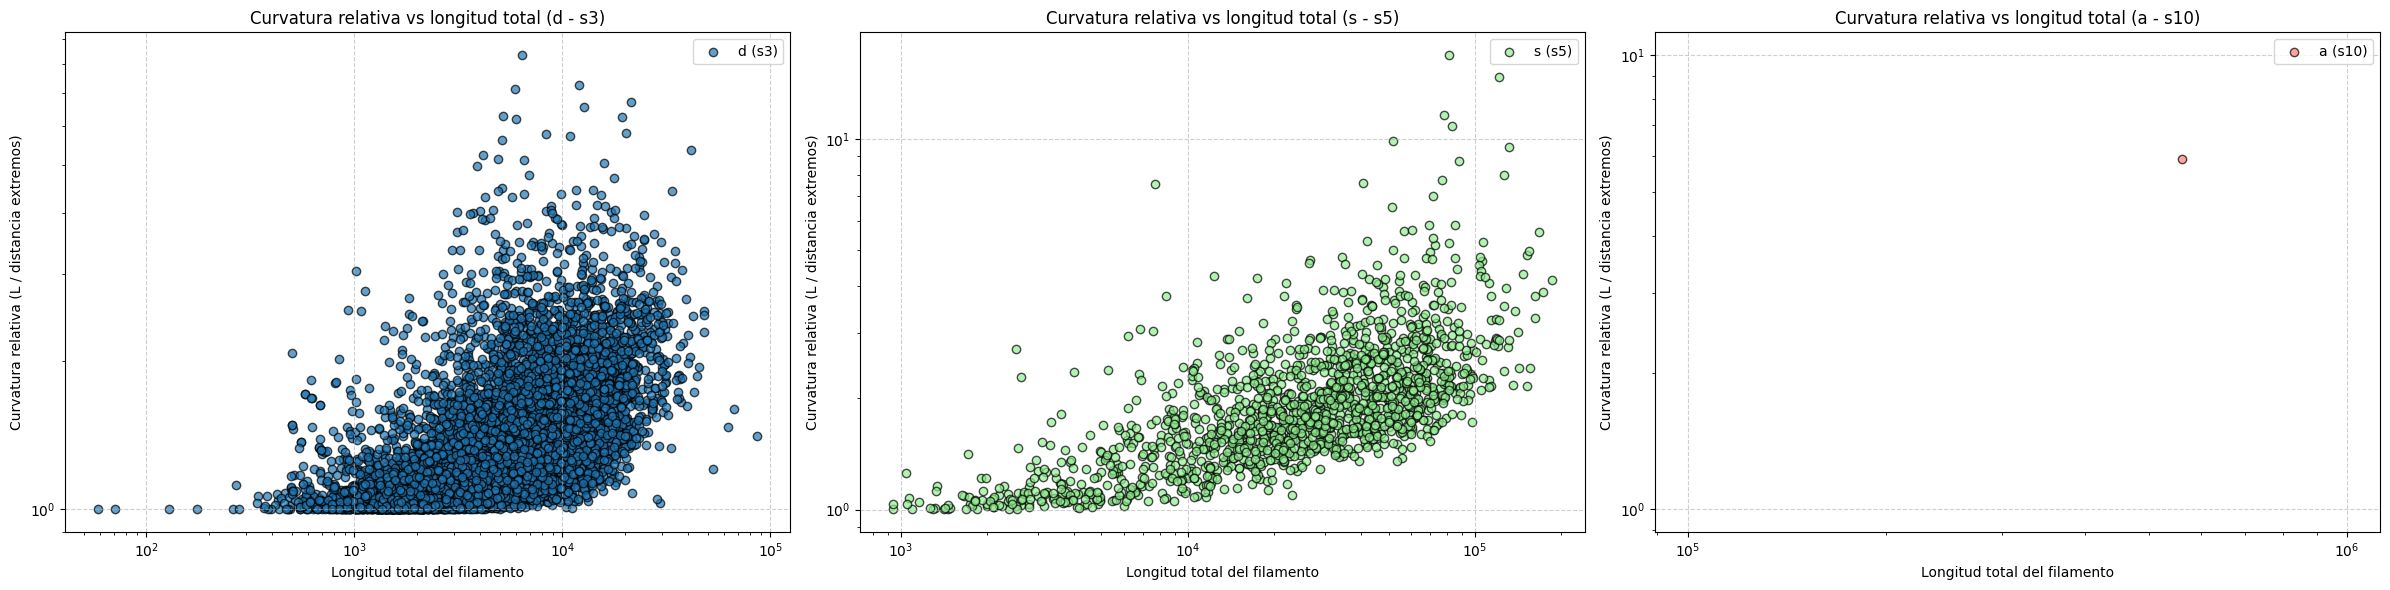

In [ ]:

import matplotlib.pyplot as plt
# Scatter plots de Curvatura vs Longitud para los 3 datasets
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Scatter plot para dataset d
axes[0].scatter(lengths_d, curvatures_d, alpha=0.7, edgecolors='k', label='d (s3)')
axes[0].set_xlabel('Longitud total del filamento')
axes[0].set_ylabel('Curvatura relativa (L / distancia extremos)')
axes[0].set_title('Curvatura relativa vs longitud total (d - s3)')
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Scatter plot para dataset s
axes[1].scatter(lengths_s, curvatures_s, alpha=0.7, edgecolors='k', color='lightgreen', label='s (s5)')
axes[1].set_xlabel('Longitud total del filamento')
axes[1].set_ylabel('Curvatura relativa (L / distancia extremos)')
axes[1].set_title('Curvatura relativa vs longitud total (s - s5)')
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Scatter plot para dataset a
axes[2].scatter(lengths_a, curvatures_a, alpha=0.7, edgecolors='k', color='salmon', label='a (s10)')
axes[2].set_xlabel('Longitud total del filamento')
axes[2].set_ylabel('Curvatura relativa (L / distancia extremos)')
axes[2].set_title('Curvatura relativa vs longitud total (a - s10)')
axes[2].set_yscale('log')
axes[2].set_xscale('log')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

plt.tight_layout()
plt.savefig('curvaturavslongitud3D.pdf', format='pdf')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np

# Función para animar filamentos 3D
def animar_filamentos_3d(dataset, nombre_dataset, output_gif=""):
    if 'FILAMENTS' in dataset and isinstance(dataset['FILAMENTS'], dict):
        filamentos_data = dataset['FILAMENTS']
        if 'SamplingPoints' in filamentos_data and 'Finfo' in filamentos_data:
            sampling_points = filamentos_data["SamplingPoints"]  # (N, 3)
            finfo = filamentos_data["Finfo"]                     # DataFrame

            # Crear figura y ejes 3D
            fig = plt.figure(figsize=(8, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Dibujar todos los filamentos una sola vez
            for index, row in finfo.iterrows():
                start = row["firstIndex"]
                size = row["nSamp"]

                if start < 0 or size < 0 or start + size > len(sampling_points):
                    continue

                filament_points = sampling_points[start : start + size]
                if filament_points.shape[0] < 2:
                    continue

                x, y, z = filament_points[:, 0], filament_points[:, 1], filament_points[:, 2]
                ax.plot(x, y, z, linewidth=0.6, alpha=0.5)
                ax.scatter(x, y, z, s=2, alpha=0.2)

            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.set_title(f"Filamentos 3D - {nombre_dataset}")

            # Ajustar límites si deseas que la rotación sea más estable
            ax.set_box_aspect([1,1,1])

            # Función de actualización para la animación (rotación)
            def update(angle):
                ax.view_init(elev=30, azim=angle)
                return fig,

            ani = animation.FuncAnimation(
                fig, update,
                frames=np.arange(0, 360, 2),  # 180 frames por vuelta
                interval=50, blit=False
            )

            if output_gif == "":
                output_gif = f"filamentos_3d_{nombre_dataset}.gif"

            ani.save(output_gif, writer="pillow", fps=20)
            plt.close(fig)
            print(f"Animación guardada: {output_gif}")
        else:
            print(f"Faltan claves 'SamplingPoints' o 'Finfo' en {nombre_dataset}.")
    else:
        print(f"Estructura inválida en {nombre_dataset}.")

# Llamar la función para cada dataset
animar_filamentos_3d(d, "s3")
animar_filamentos_3d(s, "s5")
animar_filamentos_3d(a, "s10")


Animación guardada: filamentos_3d_s3.gif
Animación guardada: filamentos_3d_s5.gif
Animación guardada: filamentos_3d_s10.gif


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
from tqdm import tqdm

# --- Preparar datos ---
filamentos_data = d['FILAMENTS']
sampling_points = filamentos_data["SamplingPoints"]
finfo = filamentos_data["Finfo"]

filamentos = [
    sampling_points[row["firstIndex"]:row["firstIndex"] + row["nSamp"]]
    for _, row in finfo.iterrows()
    if row["firstIndex"] >= 0 and row["nSamp"] >= 2 and row["firstIndex"] + row["nSamp"] <= len(sampling_points)
]

# --- Parámetros ---
modo = "filamento"
frames_rotacion = 60
intervalo_ms = 80
pasos_por_filamento = 10

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set(title="Construcción y rotación de filamentos 3D", xlabel="X", ylabel="Y", zlabel="Z")
ax.set_box_aspect([1, 1, 1])

lineas = [ax.plot([], [], [], linewidth=1.2, alpha=0.6)[0] for _ in filamentos]

total_construccion_frames = len(filamentos) if modo == "filamento" else len(filamentos) * pasos_por_filamento
total_frames = total_construccion_frames + frames_rotacion

def update(frame):
    if frame < total_construccion_frames:
        if modo == "filamento":
            for i in range(frame + 1):
                puntos = filamentos[i]
                lineas[i].set_data(puntos[:, 0], puntos[:, 1])
                lineas[i].set_3d_properties(puntos[:, 2])
        else:
            f_idx, paso = divmod(frame, pasos_por_filamento)
            for i in range(f_idx):
                puntos = filamentos[i]
                lineas[i].set_data(puntos[:, 0], puntos[:, 1])
                lineas[i].set_3d_properties(puntos[:, 2])
            if f_idx < len(filamentos):
                puntos = filamentos[f_idx]
                max_idx = max(2, int(len(puntos) * (paso + 1) / pasos_por_filamento))
                subset = puntos[:max_idx]
                lineas[f_idx].set_data(subset[:, 0], subset[:, 1])
                lineas[f_idx].set_3d_properties(subset[:, 2])
    else:
        angulo = 360 * (frame - total_construccion_frames) / frames_rotacion
        ax.view_init(elev=30, azim=angulo)
    return lineas

# --- Animación con tqdm ---
with tqdm(total=total_frames, desc="Generando animación") as pbar:
    ani = animation.FuncAnimation(
        fig,
        lambda f: update(pbar.update(1) or f),
        frames=total_frames,
        interval=intervalo_ms,
        blit=False
    )
    ani.save("construccion_y_rotacion_filamentos.gif", writer="pillow", fps=int(1000 / intervalo_ms))

plt.close()
print("GIF guardado como 'construccion_y_rotacion_filamentos.gif'")



Generando animación:  38%|███▊      | 3734/9835 [5:45:47<9:17:52,  5.49s/it]

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
# --- Cálculo para los 3 datasets 3D ---
datasets_3D = {
    filename_s3: d,
    filename_s5: s,
    filename_s10: a
}

for nombre_dataset, data in datasets_3D.items():
  print(f"\nCalculando propiedades de inercia para el dataset: {nombre_dataset}")
  sampling_points = data['FILAMENTS']['SamplingPoints']
  finfo = data['FILAMENTS']['Finfo']
  longitudes = []
  grosores_1 = [] # Para el segundo autovalor (grosor menor)
  grosores_2 = [] # Para el primer autovalor (grosor medio)
  orientaciones_vec = [] # Para almacenar los vectores principales

  # Usamos tqdm para mostrar el progreso si hay muchos filamentos
  for idx, row in tqdm(finfo.iterrows(), total=len(finfo), desc=f"Procesando filamentos de {nombre_dataset}"):
    start = row["firstIndex"]
    npoints = row["nSamp"]
    puntos = sampling_points[start : start + npoints]

    # Verificamos que haya al menos dos puntos para calcular el tensor
    if puntos.shape[0] < 2:
      # print(f"Filamento {idx} en {nombre_dataset} tiene muy pocos puntos ({puntos.shape[0]}) para calcular el tensor de inercia. Saltando.")
      longitudes.append(0) # O np.nan
      grosores_1.append(0) # O np.nan
      grosores_2.append(0) # O np.nan
      orientaciones_vec.append(np.array([0.0, 0.0, 0.0])) # O np.array([np.nan, np.nan, np.nan])
      continue

    # Calcular tensor de inercia 3D y obtener autovalores y autovectores
    try:
        I = tensor_inercia_3D(puntos)
        # np.linalg.eigh garantiza autovalores reales para matrices simétricas
        vals, vecs = np.linalg.eigh(I)

        # Ordenar valores propios de menor a mayor
        # vals[0] es el menor, vals[1] es el medio, vals[2] es el mayor
        grosor_1 = np.sqrt(max(0, vals[0])) # Asegurar que el valor sea no negativo antes de sqrt
        grosor_2 = np.sqrt(max(0, vals[1]))
        longitud = np.sqrt(max(0, vals[2]))

        # Orientación del eje principal (vector asociado al autovalor mayor)
        vec_principal = vecs[:, 2] # vector asociado a vals[2]

        # Normalizar el vector principal
        norm = np.linalg.norm(vec_principal)
        if norm > 1e-9: # Evitar división por cero o por valores muy pequeños
            vec_principal = vec_principal / norm
        else:
             vec_principal = np.array([0.0, 0.0, 0.0]) # O np.array([np.nan, np.nan, np.nan])

        longitudes.append(longitud)
        grosores_1.append(grosor_1)
        grosores_2.append(grosor_2)
        orientaciones_vec.append(vec_principal)

    except np.linalg.LinAlgError:
        print(f"Warning: No se pudo calcular el tensor de inercia para el filamento {idx} en {nombre_dataset}. Saltando.")
        longitudes.append(np.nan)
        grosores_1.append(np.nan)
        grosores_2.append(np.nan)
        orientaciones_vec.append(np.array([np.nan, np.nan, np.nan]))


  # Almacenar los resultados
  longitudes_principales_3D[nombre_dataset] = np.array(longitudes)
  grosores_transversales_3D[nombre_dataset] = [np.array(grosores_1), np.array(grosores_2)]
  orientaciones_3D[nombre_dataset] = np.array(orientaciones_vec)

print("\n¡Cálculo de inercia y propiedades 3D completado para los 3 datasets!")


Calculando propiedades de inercia para el dataset: sussing_125.z0.000_filt_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl


Procesando filamentos de sussing_125.z0.000_filt_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl: 100%|██████████| 9775/9775 [00:04<00:00, 1958.95it/s]



Calculando propiedades de inercia para el dataset: sussing_125.z0.000_filt_NP.a.ND.NDnet_s5.up.NDskl.a.NDskl


Procesando filamentos de sussing_125.z0.000_filt_NP.a.ND.NDnet_s5.up.NDskl.a.NDskl: 100%|██████████| 1538/1538 [00:00<00:00, 4858.88it/s]



Calculando propiedades de inercia para el dataset: sussing_125.z0.000_filt_NP.a.ND.NDnet_s10.up.NDskl.a.NDskl


Procesando filamentos de sussing_125.z0.000_filt_NP.a.ND.NDnet_s10.up.NDskl.a.NDskl: 100%|██████████| 1/1 [00:00<00:00, 1153.87it/s]


¡Cálculo de inercia y propiedades 3D completado para los 3 datasets!


In [ ]:
import numpy as np

def mostrar_estadisticos_array(arr, name):
    media = np.nanmean(arr)
    mediana = np.nanmedian(arr)
    std = np.nanstd(arr)
    print(f"Estadísticos para {name}:")
    print(f"  Media: {media:.4f}")
    print(f"  Mediana: {mediana:.4f}")
    print(f"  Desviación estándar: {std:.4f}")
    print("-" * 30)

def mostrar_estadisticos_vectores(vecs, name):
    # Para vectores 3D, mostramos estadísticos por componente
    vecs = np.array(vecs)
    for i, comp in enumerate(['X', 'Y', 'Z']):
        comp_vals = vecs[:, i]
        print(f"Estadísticos para {name} componente {comp}:")
        print(f"  Media: {np.nanmean(comp_vals):.4f}")
        print(f"  Mediana: {np.nanmedian(comp_vals):.4f}")
        print(f"  Desviación estándar: {np.nanstd(comp_vals):.4f}")
        print("-" * 20)

# Iterar sobre datasets y mostrar resultados
for nombre_dataset in datasets_3D.keys():
    print(f"\nEstadísticos para dataset: {nombre_dataset}")

    # Longitudes principales
    mostrar_estadisticos_array(longitudes_principales_3D[nombre_dataset], "Longitudes principales")

    # Grosores transversales 1 y 2
    grosores1 = grosores_transversales_3D[nombre_dataset][0]
    grosores2 = grosores_transversales_3D[nombre_dataset][1]
    mostrar_estadisticos_array(grosores1, "Grosor transversal 1 (√λ menor)")
    mostrar_estadisticos_array(grosores2, "Grosor transversal 2 (√λ medio)")

    # Orientaciones vectoriales
    mostrar_estadisticos_vectores(orientaciones_3D[nombre_dataset], "Orientaciones vectoriales")



Estadísticos para dataset: sussing_125.z0.000_filt_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl
Estadísticos para Longitudes principales:
  Media: 5506.0703
  Mediana: 3851.4885
  Desviación estándar: 5250.8071
------------------------------
Estadísticos para Grosor transversal 1 (√λ menor):
  Media: 1690.4131
  Mediana: 975.9868
  Desviación estándar: 2076.5144
------------------------------
Estadísticos para Grosor transversal 2 (√λ medio):
  Media: 5258.7490
  Mediana: 3670.6155
  Desviación estándar: 5009.9004
------------------------------
Estadísticos para Orientaciones vectoriales componente X:
  Media: 0.1599
  Mediana: 0.1919
  Desviación estándar: 0.5600
--------------------
Estadísticos para Orientaciones vectoriales componente Y:
  Media: 0.0542
  Mediana: 0.1100
  Desviación estándar: 0.5746
--------------------
Estadísticos para Orientaciones vectoriales componente Z:
  Media: 0.1028
  Mediana: 0.1323
  Desviación estándar: 0.5631
--------------------

Estadísticos para dataset: su

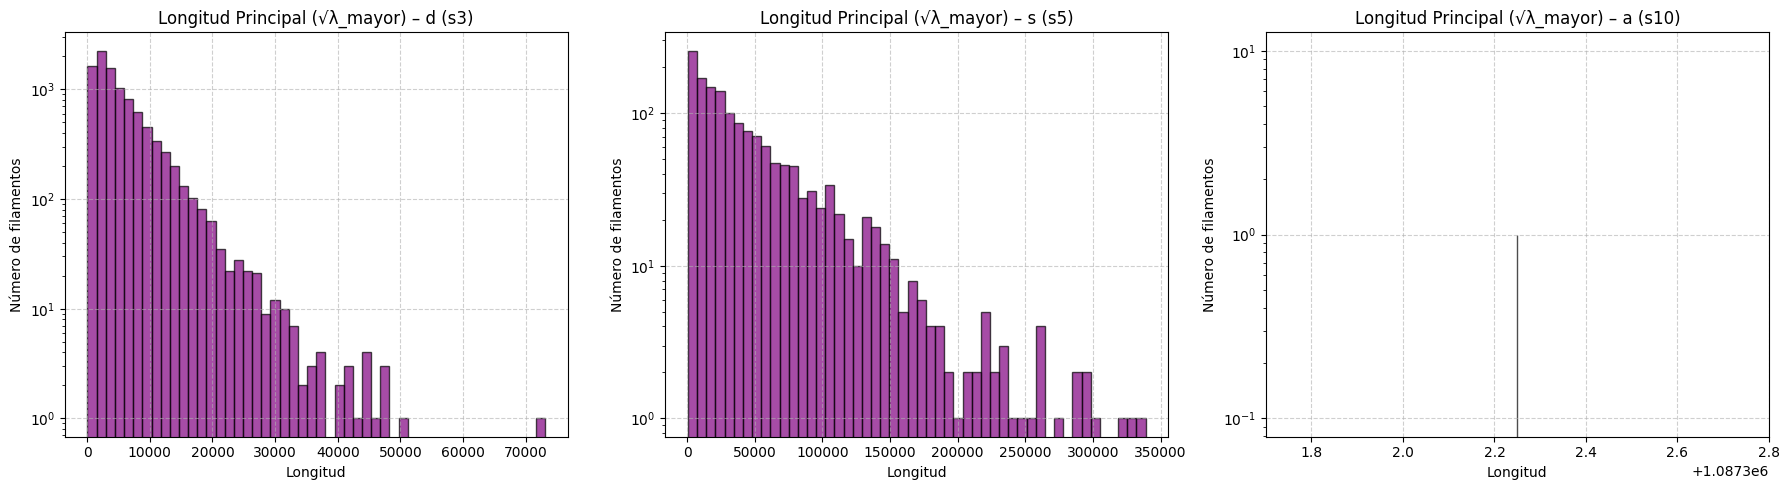

In [ ]:
import os

# Crear carpeta de salida si no existe
os.makedirs("figuras_pdf", exist_ok=True)

# --- Histograma de Longitudes Principales ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, nombre in enumerate(datasets_to_plot):
    axes[i].hist(longitudes_principales_3D[nombre], bins=50, color='purple', alpha=0.7, edgecolor='black')
    axes[i].set_title(f"Longitud Principal (√λ_mayor) – {dataset_titles[i]}")
    axes[i].set_xlabel("Longitud")
    axes[i].set_ylabel("Número de filamentos")
    axes[i].set_yscale('log')
    axes[i].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('tensorlongitud3D.pdf', format='pdf')
plt.show()






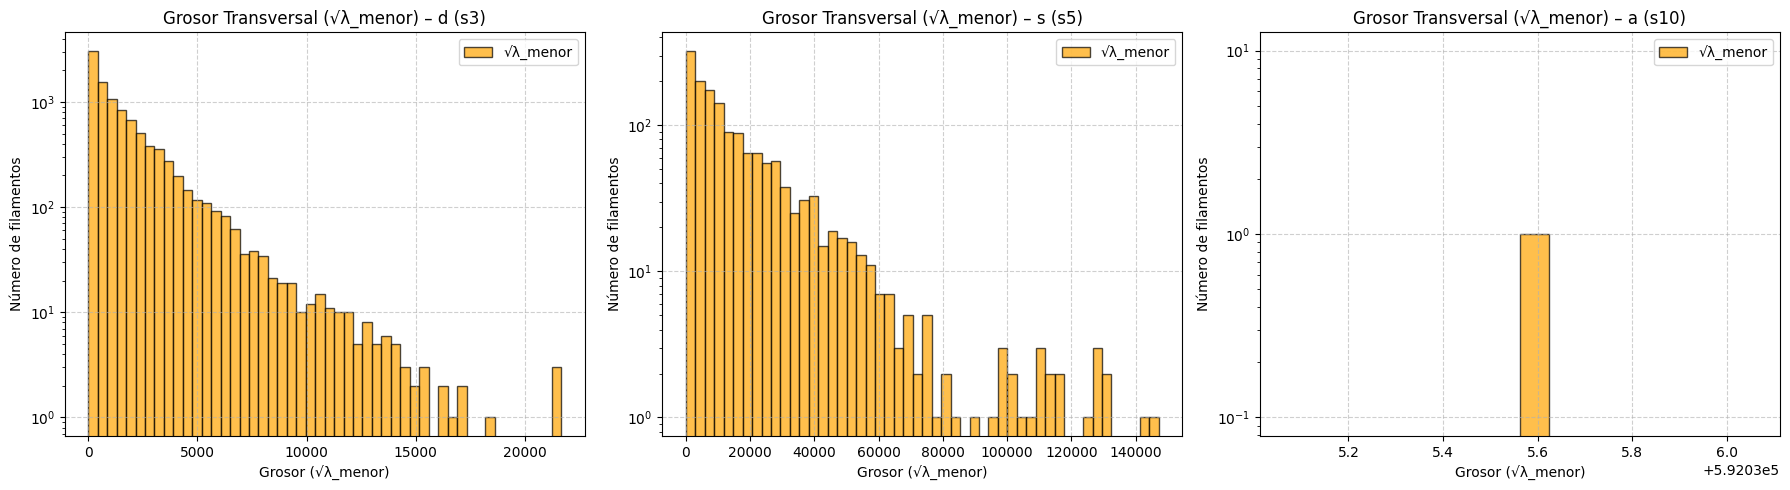

In [ ]:
# --- Histograma de Grosor Transversal (√λ_menor) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, nombre in enumerate(datasets_to_plot):
    grosores_1 = grosores_transversales_3D[nombre][0]  # √λ_menor
    grosores_1_valid = grosores_1[~np.isnan(grosores_1)]

    axes[i].hist(grosores_1_valid, bins=50, color='orange', alpha=0.7, label='√λ_menor', edgecolor='black')
    axes[i].set_title(f"Grosor Transversal (√λ_menor) – {dataset_titles[i]}")
    axes[i].set_xlabel("Grosor (√λ_menor)")
    axes[i].set_ylabel("Número de filamentos")
    axes[i].set_yscale('log')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('tensorgrosor3D.pdf', format='pdf')
plt.show()

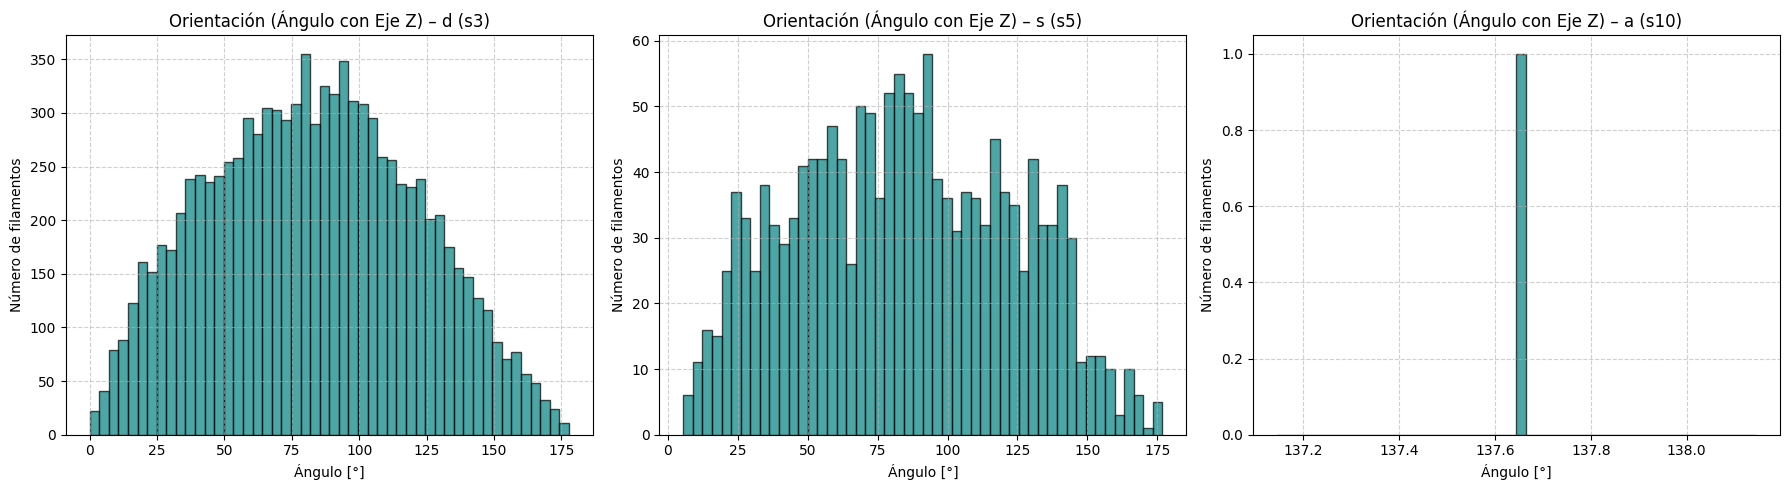

In [ ]:
# --- Histograma de Orientación (ángulo con eje Z) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, nombre in enumerate(datasets_to_plot):
    orientaciones_vec = orientaciones_3D[nombre]
    valid_indices = ~np.isnan(orientaciones_vec).any(axis=1)
    orientaciones_vec_valid = orientaciones_vec[valid_indices]

    dot_products_z = np.dot(orientaciones_vec_valid, [0, 0, 1])
    cos_angles_z = np.clip(dot_products_z, -1, 1)
    angles_z = np.degrees(np.arccos(cos_angles_z))

    axes[i].hist(angles_z, bins=50, color='teal', alpha=0.7, edgecolor='black')
    axes[i].set_title(f"Orientación (Ángulo con Eje Z) – {dataset_titles[i]}")
    axes[i].set_xlabel("Ángulo [°]")
    axes[i].set_ylabel("Número de filamentos")
    axes[i].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('tensororientacion3D.pdf', format='pdf')
plt.show()

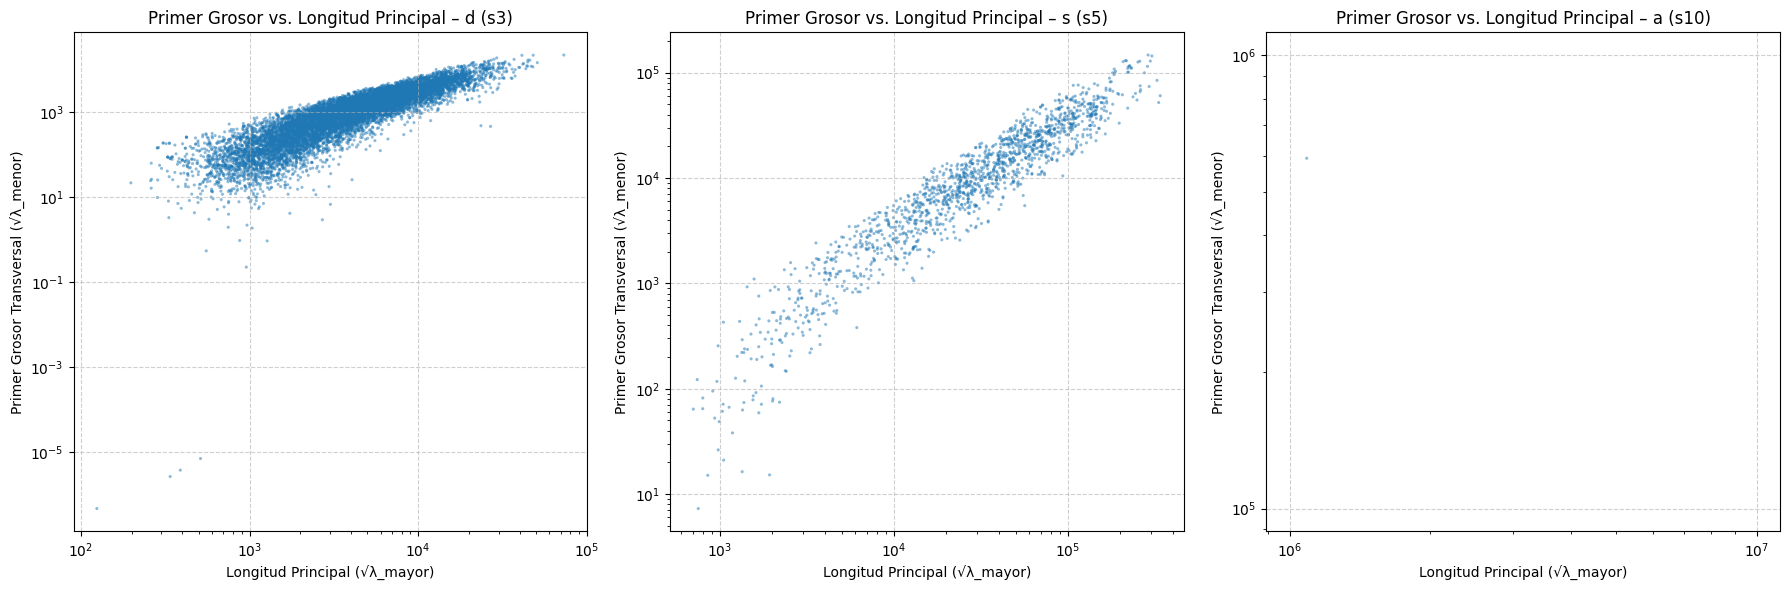

In [ ]:
# --- Scatter plot: Longitud Principal vs Grosor (√λ_menor) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, nombre in enumerate(datasets_to_plot):
    longitudes = longitudes_principales_3D[nombre]
    grosores_1 = grosores_transversales_3D[nombre][0]
    valid_indices = (longitudes > 0) & (grosores_1 > 0) & ~np.isnan(longitudes) & ~np.isnan(grosores_1)

    axes[i].scatter(longitudes[valid_indices], grosores_1[valid_indices], alpha=0.5, edgecolor='none', s=5)
    axes[i].set_title(f"Primer Grosor vs. Longitud Principal – {dataset_titles[i]}")
    axes[i].set_xlabel("Longitud Principal (√λ_mayor)")
    axes[i].set_ylabel("Primer Grosor Transversal (√λ_menor)")
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("figuras_pdf/scatter_longitud_vs_grosor.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()


Dataset: sussing_125.z0.000_filt_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl
Δ promedio = -1111.4204
σ promedio = 21.57%
Ratio promedio = 0.7951

Dataset: sussing_125.z0.000_filt_NP.a.ND.NDnet_s5.up.NDskl.a.NDskl
Δ promedio = 13578.0391
σ promedio = 30.01%
Ratio promedio = 1.1816

Dataset: sussing_125.z0.000_filt_NP.a.ND.NDnet_s10.up.NDskl.a.NDskl
Δ promedio = 524342.0000
σ promedio = 93.14%
Ratio promedio = 1.9314


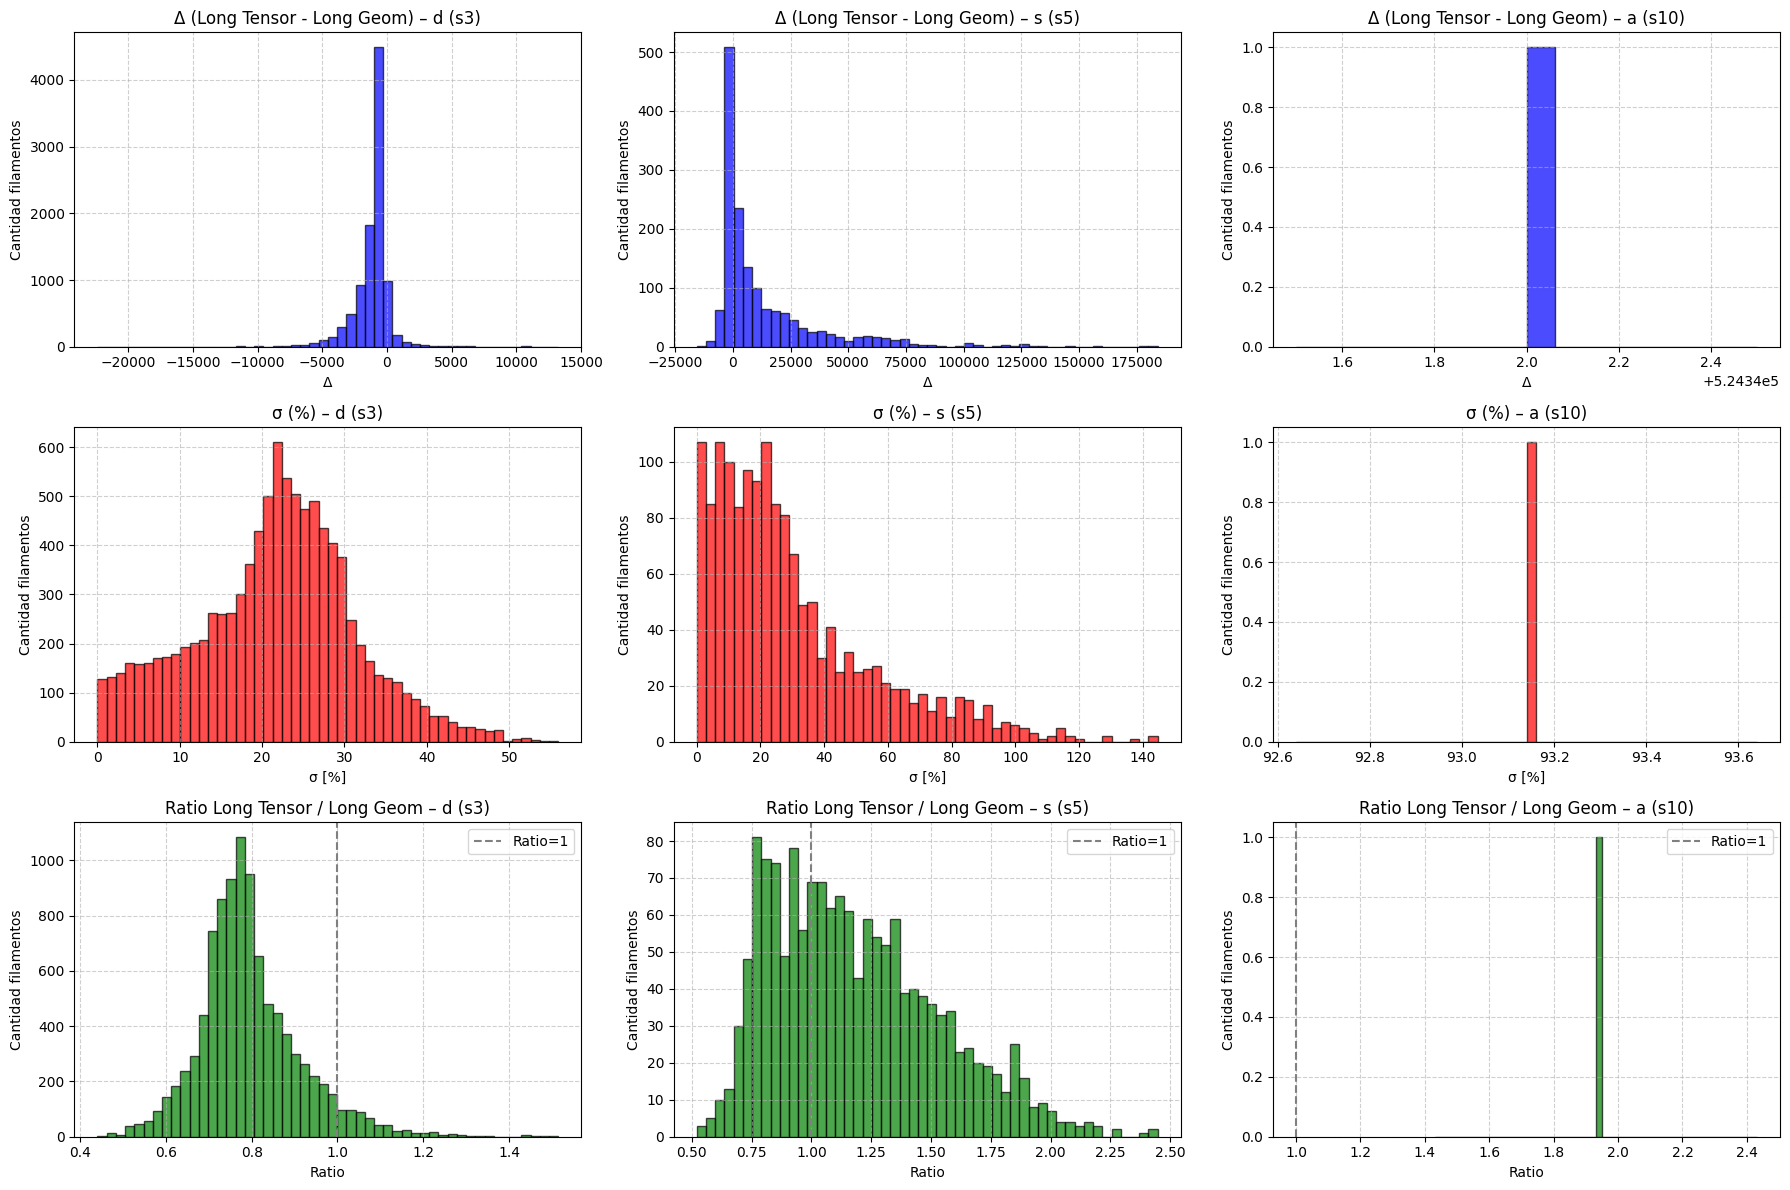

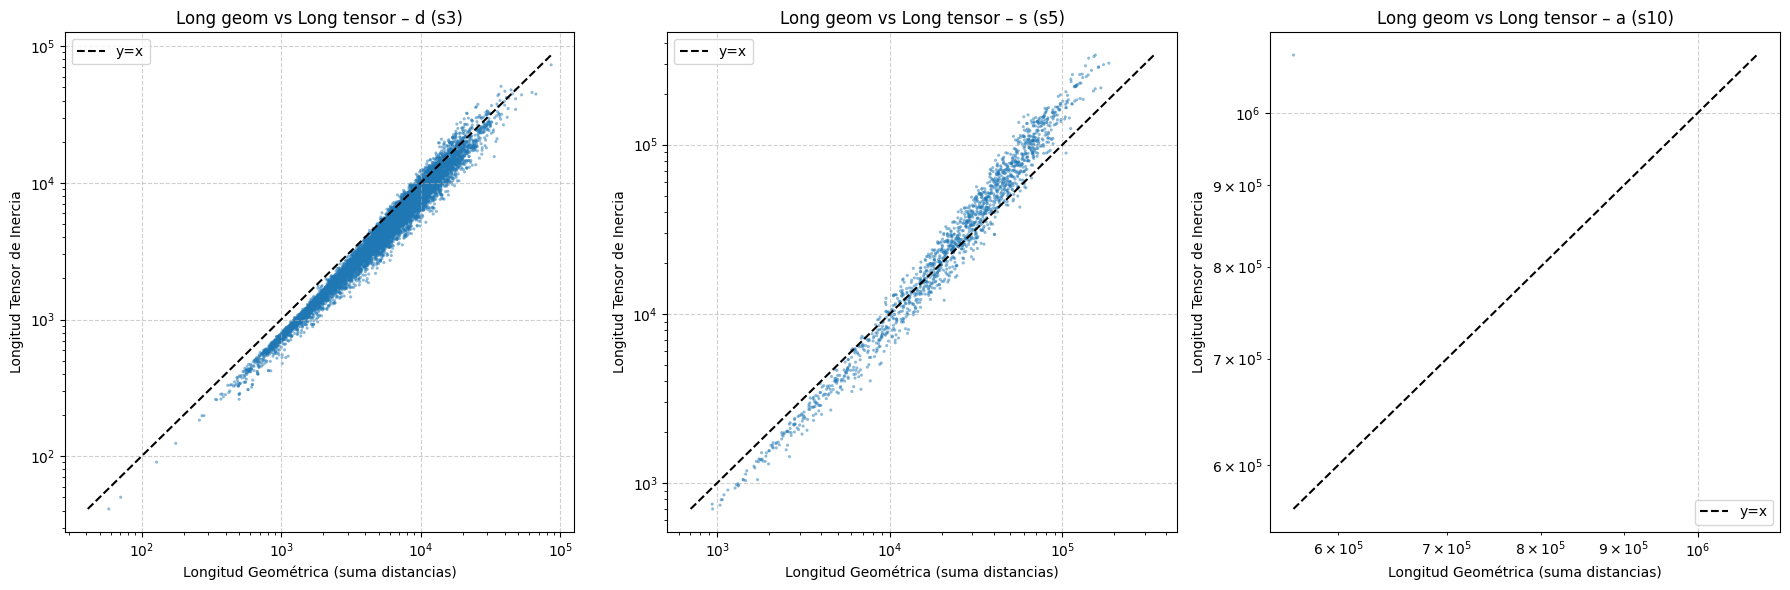

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Armar diccionarios para acceso uniforme
longitudes_geom = {
    filename_s3: np.array(lengths_d),
    filename_s5: np.array(lengths_s),
    filename_s10: np.array(lengths_a)
}

datasets_3D = {
    filename_s3: d,
    filename_s5: s,
    filename_s10: a
}

# Diccionarios para resultados
deltas = {}
sigmas = {}
ratios = {}

for nombre_dataset, data in datasets_3D.items():
    L_geom = longitudes_geom[nombre_dataset]
    L_tensor = longitudes_principales_3D[nombre_dataset]

    # Igualar tamaños para evitar errores
    n = min(len(L_geom), len(L_tensor))
    L_geom = L_geom[:n]
    L_tensor = L_tensor[:n]

    # Filtrar datos válidos
    mask_valid = (~np.isnan(L_geom)) & (~np.isnan(L_tensor)) & (L_geom > 0) & (L_tensor > 0)

    delta = L_tensor[mask_valid] - L_geom[mask_valid]
    sigma = np.abs(delta) / L_geom[mask_valid] * 100
    ratio = L_tensor[mask_valid] / L_geom[mask_valid]

    deltas[nombre_dataset] = delta
    sigmas[nombre_dataset] = sigma
    ratios[nombre_dataset] = ratio

    print(f"\nDataset: {nombre_dataset}")
    print(f"Δ promedio = {np.mean(delta):.4f}")
    print(f"σ promedio = {np.mean(sigma):.2f}%")
    print(f"Ratio promedio = {np.mean(ratio):.4f}")

# Graficar histogramas para cada dataset
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
dataset_titles = ['d (s3)', 's (s5)', 'a (s10)']
datasets_keys = list(datasets_3D.keys())

for i, nombre_dataset in enumerate(datasets_keys):
    # Histograma Δ
    axes[0, i].hist(deltas[nombre_dataset], bins=50, color='blue', alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f"Δ (Long Tensor - Long Geom) – {dataset_titles[i]}")
    axes[0, i].set_xlabel("Δ")
    axes[0, i].set_ylabel("Cantidad filamentos")
    axes[0, i].grid(True, linestyle='--', alpha=0.6)

    # Histograma σ %
    axes[1, i].hist(sigmas[nombre_dataset], bins=50, color='red', alpha=0.7, edgecolor='black')
    axes[1, i].set_title(f"σ (%) – {dataset_titles[i]}")
    axes[1, i].set_xlabel("σ [%]")
    axes[1, i].set_ylabel("Cantidad filamentos")
    axes[1, i].grid(True, linestyle='--', alpha=0.6)

    # Histograma ratio
    axes[2, i].hist(ratios[nombre_dataset], bins=50, color='green', alpha=0.7, edgecolor='black')
    axes[2, i].axvline(1, color='gray', linestyle='--', label="Ratio=1")
    axes[2, i].set_title(f"Ratio Long Tensor / Long Geom – {dataset_titles[i]}")
    axes[2, i].set_xlabel("Ratio")
    axes[2, i].set_ylabel("Cantidad filamentos")
    axes[2, i].legend()
    axes[2, i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Scatter plots longitud geométrica vs tensor de inercia
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, nombre_dataset in enumerate(datasets_keys):
    L_geom = longitudes_geom[nombre_dataset]
    L_tensor = longitudes_principales_3D[nombre_dataset]

    n = min(len(L_geom), len(L_tensor))
    L_geom = L_geom[:n]
    L_tensor = L_tensor[:n]

    mask_valid = (~np.isnan(L_geom)) & (~np.isnan(L_tensor)) & (L_geom > 0) & (L_tensor > 0)

    axes[i].scatter(L_geom[mask_valid], L_tensor[mask_valid], s=5, alpha=0.5, edgecolor='none')
    min_val = min(L_geom[mask_valid].min(), L_tensor[mask_valid].min())
    max_val = max(L_geom[mask_valid].max(), L_tensor[mask_valid].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', label="y=x")
    axes[i].set_title(f"Long geom vs Long tensor – {dataset_titles[i]}")
    axes[i].set_xlabel("Longitud Geométrica (suma distancias)")
    axes[i].set_ylabel("Longitud Tensor de Inercia")
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


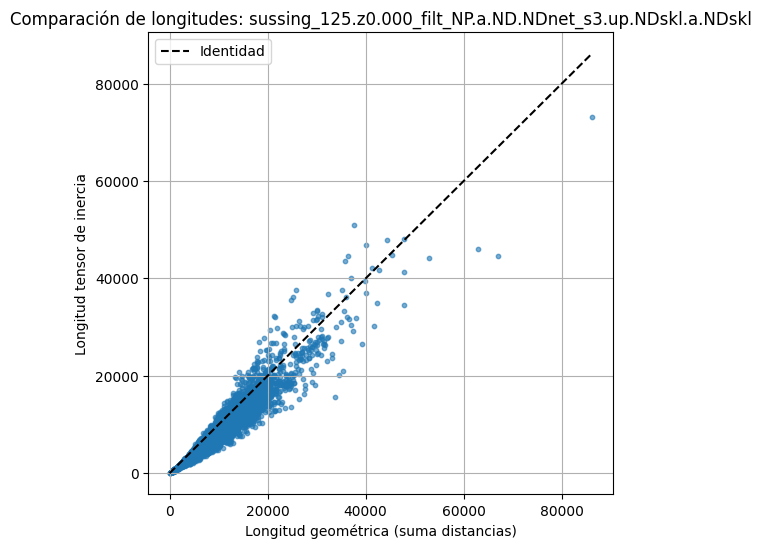

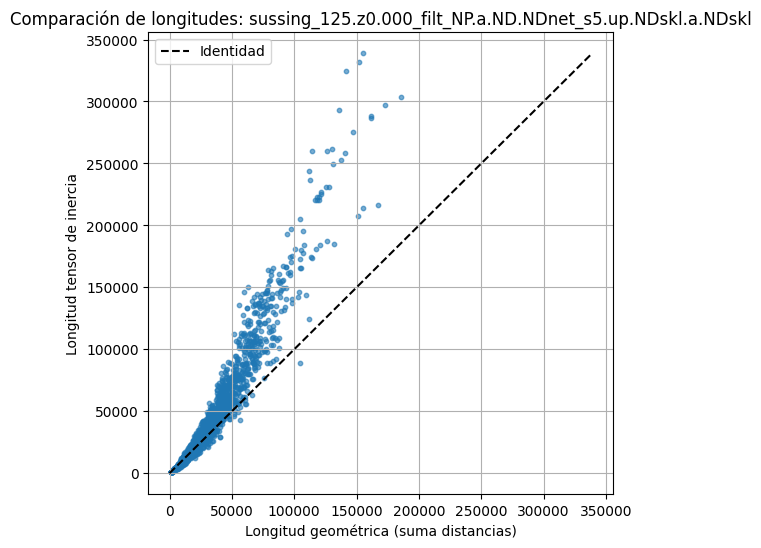

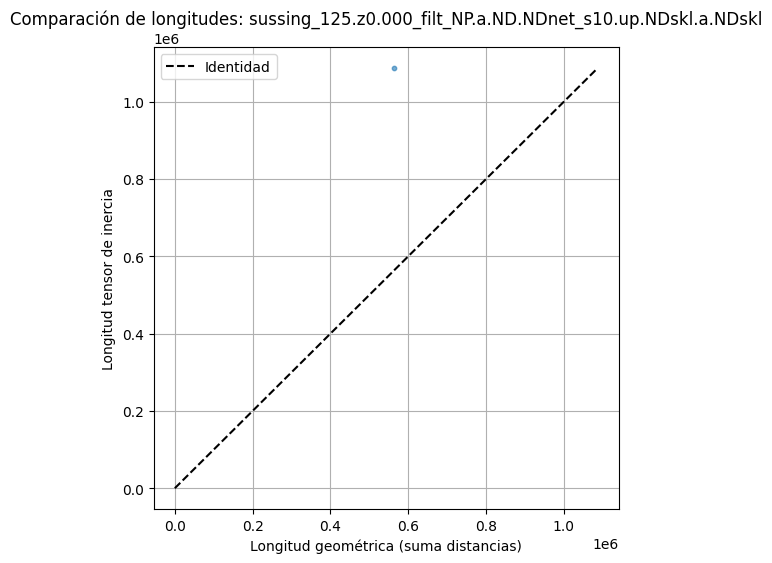

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for nombre_dataset in datasets_3D.keys():
    L_geom = longitudes_geom[nombre_dataset]
    L_tensor = longitudes_principales_3D[nombre_dataset]

    n = min(len(L_geom), len(L_tensor))
    L_geom = L_geom[:n]
    L_tensor = L_tensor[:n]

    mask_valid = (~np.isnan(L_geom)) & (~np.isnan(L_tensor)) & (L_geom > 0) & (L_tensor > 0)

    plt.figure(figsize=(6,6))
    plt.scatter(L_geom[mask_valid], L_tensor[mask_valid], s=10, alpha=0.6)
    max_val = max(np.max(L_geom[mask_valid]), np.max(L_tensor[mask_valid]))
    plt.plot([0, max_val], [0, max_val], 'k--', label='Identidad')
    plt.xlabel('Longitud geométrica (suma distancias)')
    plt.ylabel('Longitud tensor de inercia')
    plt.title(f'Comparación de longitudes: {nombre_dataset}')
    plt.legend()
    plt.grid(True)
    plt.show()



Filamentos con mayor diferencia en dataset sussing_125.z0.000_filt_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl:
Filamento idx=7994: Δ=-22367.5859, L_geom=67034.2969, L_tensor=44666.7109


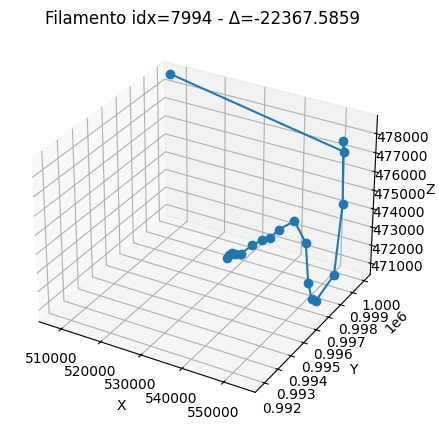

Filamento idx=154: Δ=-18129.3242, L_geom=33703.3828, L_tensor=15574.0576


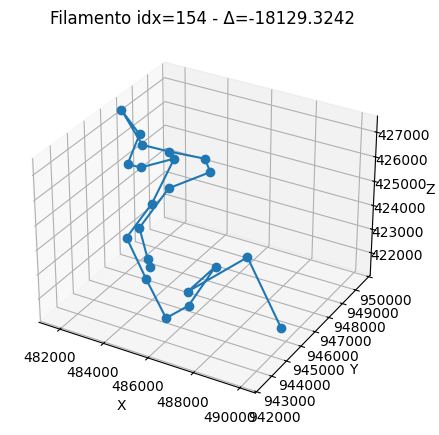

Filamento idx=7995: Δ=-16898.0938, L_geom=62853.9375, L_tensor=45955.8438


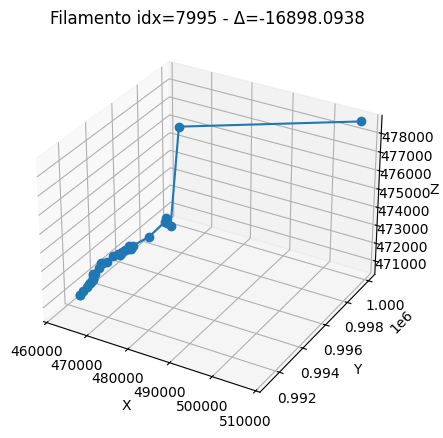

Filamento idx=998: Δ=-14512.1797, L_geom=34608.1680, L_tensor=20095.9883


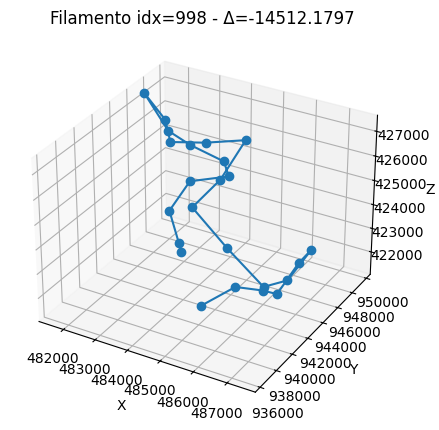

Filamento idx=3621: Δ=-14254.6348, L_geom=35286.8359, L_tensor=21032.2012


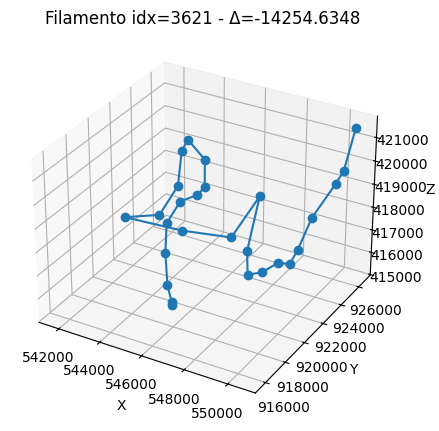


Filamentos con mayor diferencia en dataset sussing_125.z0.000_filt_NP.a.ND.NDnet_s5.up.NDskl.a.NDskl:
Filamento idx=554: Δ=183987.3438, L_geom=154970.4062, L_tensor=338957.7500


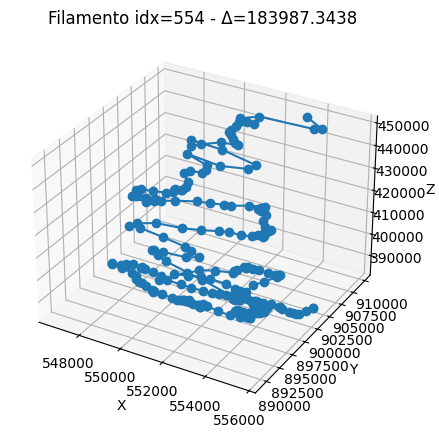

Filamento idx=1314: Δ=182881.8594, L_geom=141829.5781, L_tensor=324711.4375


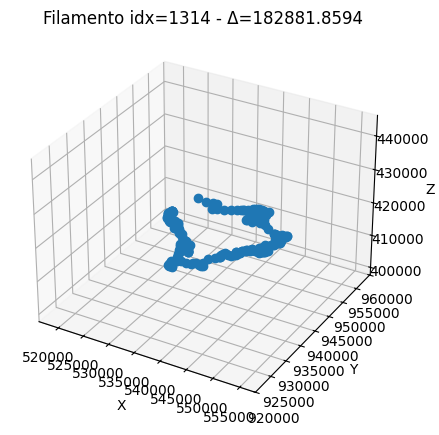

Filamento idx=1418: Δ=179906.7812, L_geom=152191.8125, L_tensor=332098.5938


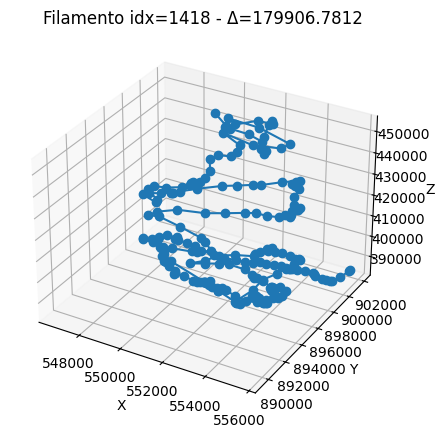

Filamento idx=1444: Δ=156898.5312, L_geom=135882.2812, L_tensor=292780.8125


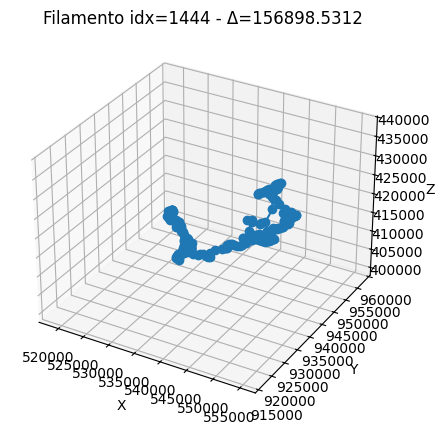

Filamento idx=1308: Δ=145562.1250, L_geom=114146.9531, L_tensor=259709.0781


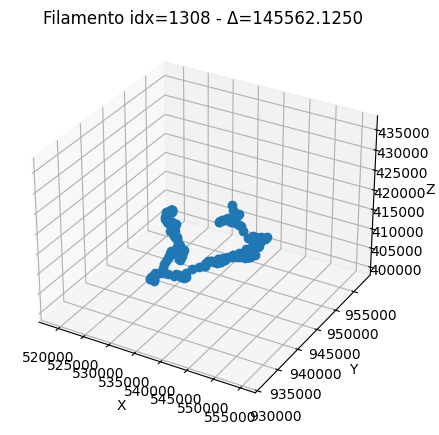


Filamentos con mayor diferencia en dataset sussing_125.z0.000_filt_NP.a.ND.NDnet_s10.up.NDskl.a.NDskl:
Filamento idx=0: Δ=524342.0000, L_geom=562960.2500, L_tensor=1087302.2500


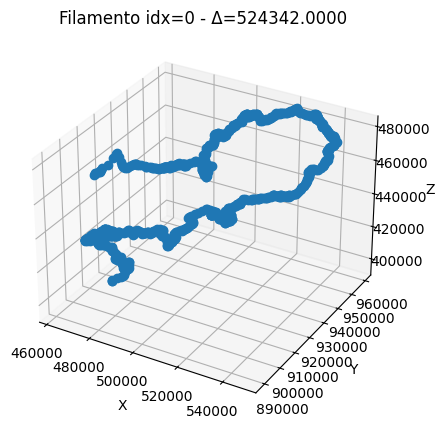

In [ ]:
# Mostrar índices con mayores diferencias
for nombre_dataset in datasets_3D.keys():
    L_geom = longitudes_geom[nombre_dataset]
    L_tensor = longitudes_principales_3D[nombre_dataset]
    n = min(len(L_geom), len(L_tensor))
    L_geom = L_geom[:n]
    L_tensor = L_tensor[:n]

    mask_valid = (~np.isnan(L_geom)) & (~np.isnan(L_tensor)) & (L_geom > 0) & (L_tensor > 0)
    delta = L_tensor[mask_valid] - L_geom[mask_valid]

    # Indices de mayor diferencia absoluta
    indices_sorted = np.argsort(np.abs(delta))[::-1]  # descendente

    print(f"\nFilamentos con mayor diferencia en dataset {nombre_dataset}:")

    # Mostrar top 5
    for i in indices_sorted[:5]:
        idx_real = np.where(mask_valid)[0][i]  # índice real en los arrays originales
        print(f"Filamento idx={idx_real}: Δ={delta[i]:.4f}, L_geom={L_geom[i]:.4f}, L_tensor={L_tensor[i]:.4f}")

        # Visualizar los puntos del filamento
        sampling_points = datasets_3D[nombre_dataset]['FILAMENTS']['SamplingPoints']
        finfo = datasets_3D[nombre_dataset]['FILAMENTS']['Finfo']
        row = finfo.iloc[idx_real]
        start = row["firstIndex"]
        npoints = row["nSamp"]
        puntos = sampling_points[start : start + npoints]

        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(projection='3d')
        ax.plot(puntos[:,0], puntos[:,1], puntos[:,2], '-o')
        ax.set_title(f'Filamento idx={idx_real} - Δ={delta[i]:.4f}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()
